# Glass Identification Project

# 1. Introduction

# Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

- **Objective**: The goal is to classify glass samples into one of six classes based on their chemical properties.

# Attribute Information

- **Attribute Information**:
   1. Id number: Unique identifier for each sample.
   2. RI: Refractive index.
   3. Na: Sodium.
   4. Mg: Magnesium.
   5. Al: Aluminum.
   6. Si: Silicon.
   7. K: Potassium.
   8. Ca: Calcium.
   9. Ba: Barium.
   10. Fe: Iron.
   11. Type of glass: Class attribute representing the type of glass.

- **Classes**:
   - 1: building_windows_float_processed
   - 2: building_windows_non_float_processed
   - 3: vehicle_windows_float_processed
   - 4: vehicle_windows_non_float_processed (none in this dataset)
   - 5: containers
   - 6: tableware
   - 7: headlamps

The dataset contains chemical properties of glass samples, with attributes including refractive index and weight percent of various oxides. There are 214 observations, each belonging to one of seven classes representing different types of glass.The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

# Analysis Approach
The dataset will be used to train a classification model to predict the type of glass based on its chemical composition.

# 2. Data Cleaning

# Import important library :

In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

loading the dataset the file directly from the GitHub repository link using the raw option.

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv')

In [3]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


Our column names are represented by numbers, whereas in the problem statement, the columns are named sequentially. Therefore, we assigned the same names to our DataFrame accordingly.

In [4]:
df.columns=['id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glasses']

In [5]:
df.head()#first 5 rows

,id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
df[150:160]#middle 10 rows

,id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
150,152,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.0,0.00,3
151,153,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3
152,154,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,3
153,155,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.0,0.00,3
154,156,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
155,157,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
156,158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3
157,159,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
158,160,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3
159,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.0,0.00,3


In [7]:
df.tail()#last 5 rows

,id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


Upon examining the above dataframe, it's evident that the 'Type_of_glasses' column serves as the target label, while the remaining columns become the features we can manipulate and employ to forecast our label. This categorization indicates that we're dealing with a Classification problem!

**Categorization Of Target Variable into into binary classes either 0 & 1**

In [8]:
df['Type_of_glasses'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [9]:
df['Type_of_glasses'].value_counts()

Type_of_glasses
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [10]:
df.loc[df['Type_of_glasses'] < 5, 'Type_of_glasses'] = 1
df.loc[df['Type_of_glasses'] > 4, 'Type_of_glasses'] = 0

In [11]:
df['Type_of_glasses'].unique()

array([1, 0], dtype=int64)

It's evident that our target variable exhibits a class imbalance issue.

In [12]:
df

,id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,0
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,0
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,0
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,0


As indicated in our dataset, we've categorized the data into two groups: window glass "(classes 1-4)=0" and non-window glass "(classes 5-7)=1", and we've made the necessary conversions accordingly.

# Exploratory Data Analysis (EDA)

In [13]:
df.shape

(213, 11)

The dataset comprises a total of 213 rows and 11 columns.

In [14]:
df.dtypes

id_number            int64
RI                 float64
Na                 float64
Mg                 float64
Al                 float64
Si                 float64
K                  float64
Ca                 float64
Ba                 float64
Fe                 float64
Type_of_glasses      int64
dtype: object

All columns in the dataset contain data of either the integer or float type.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_number        213 non-null    int64  
 1   RI               213 non-null    float64
 2   Na               213 non-null    float64
 3   Mg               213 non-null    float64
 4   Al               213 non-null    float64
 5   Si               213 non-null    float64
 6   K                213 non-null    float64
 7   Ca               213 non-null    float64
 8   Ba               213 non-null    float64
 9   Fe               213 non-null    float64
 10  Type_of_glasses  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


The dataset comprises entries indexed from 0 to 213, totaling 214 entries, and the data within these columns are either integers or floats.

In [16]:
df.describe()

,id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,0.760563
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,0.427745
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,1.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,1.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [17]:
df['Type_of_glasses'].value_counts()

Type_of_glasses
1    162
0     51
Name: count, dtype: int64

In [18]:
df.nunique().to_frame('No of unique values')

,No of unique values
id_number,213
RI,177
Na,142
Mg,93
Al,117
Si,132
K,65
Ca,143
Ba,34
Fe,32


We observe that "Type_of_glasses" serves as our target variable, containing values of either 0 or 1, thereby rendering it a binary classification problem.

In [19]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')


id_number
2      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
214    1
Name: count, Length: 213, dtype: int64


RI
1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 177, dtype: int64


Na
13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: count, Length: 93, dtype: int64


Al
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: count, Length: 117, dtype: int64


Si
72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: count, Length: 132, dtype: int64


K
0.00    30
0.

It's noticeable that some columns such as K, Mg, Ba, and Fe contain instances of zero values.

**Lets replace zeros with mean value of the individual columns-**

In [20]:
df['K']=df['K'].replace(0,df['K'].mean())
df['Mg']=df['Mg'].replace(0,df['Mg'].mean())
df['Ba']=df['Ba'].replace(0,df['Ba'].mean())
df['Fe']=df['Fe'].replace(0,df['Fe'].mean())

In [21]:
df

,id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
0,2,1.51761,13.89,3.600000,1.36,72.73,0.480000,7.83,0.175869,0.057277,1
1,3,1.51618,13.53,3.550000,1.54,72.99,0.390000,7.78,0.175869,0.057277,1
2,4,1.51766,13.21,3.690000,1.29,72.61,0.570000,8.22,0.175869,0.057277,1
3,5,1.51742,13.27,3.620000,1.24,73.08,0.550000,8.07,0.175869,0.057277,1
4,6,1.51596,12.79,3.610000,1.62,72.97,0.640000,8.07,0.175869,0.260000,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,2.676056,2.88,72.61,0.080000,9.18,1.060000,0.057277,0
209,211,1.51685,14.92,2.676056,1.99,73.06,0.499108,8.40,1.590000,0.057277,0
210,212,1.52065,14.36,2.676056,2.02,73.42,0.499108,8.44,1.640000,0.057277,0
211,213,1.51651,14.38,2.676056,1.94,73.61,0.499108,8.48,1.570000,0.057277,0


In [22]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

id_number
2      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
214    1
Name: count, Length: 213, dtype: int64


RI
1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 177, dtype: int64


Na
13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
2.676056    42
3.480000     8
3.580000     8
3.540000     8
3.520000     7
            ..
3.460000     1
3.730000     1
3.970000     1
3.890000     1
1.780000     1
Name: count, Length: 93, dtype: int64


Al
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: count, Length: 117, dtype: int64


Si
72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: count,

Now, it's evident that our columns are devoid of zero values.

In [23]:
df.duplicated().sum()

0

No duplicate values are present in the dataset.

In [24]:
# Calculate counts and unique values for each column
column_info = pd.DataFrame({'Column': df.columns,
                            'Count': df.count(),
                            'Unique Values': df.nunique()})
column_info

,Column,Count,Unique Values
id_number,id_number,213,213
RI,RI,213,177
Na,Na,213,142
Mg,Mg,213,93
Al,Al,213,117
Si,Si,213,132
K,K,213,65
Ca,Ca,213,143
Ba,Ba,213,34
Fe,Fe,213,32


In [25]:
df.isnull().sum()

id_number          0
RI                 0
Na                 0
Mg                 0
Al                 0
Si                 0
K                  0
Ca                 0
Ba                 0
Fe                 0
Type_of_glasses    0
dtype: int64

In [26]:
df.isnull().sum().sum()

0

<Axes: >

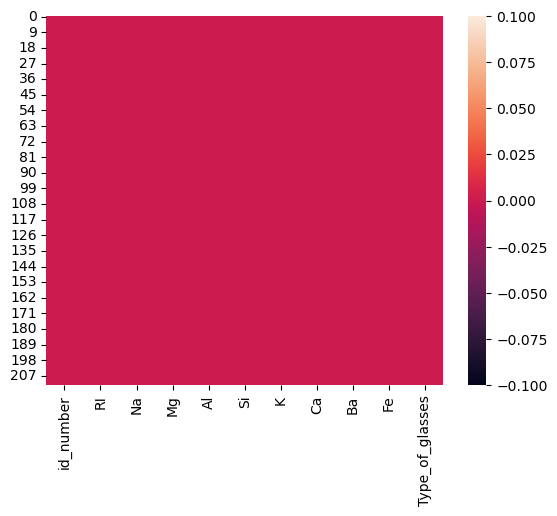

In [27]:
sns.heatmap(df.isnull())

It's evident that none of the columns contain null values.

**Removing unnecessary columns**

# 3. Data Visualization

# Univariate analysis-
Univariate analysis focuses on understanding one variable at a time. It examines its distribution, central tendency, and variability using techniques like histograms, box plots, and summary statistics. It helps reveal patterns and characteristics within the variable without considering its relationship with other variables.

# Histogram

**We will create a histogram to visually represent the distribution of the data within the dataset's columns containing continuous values.**

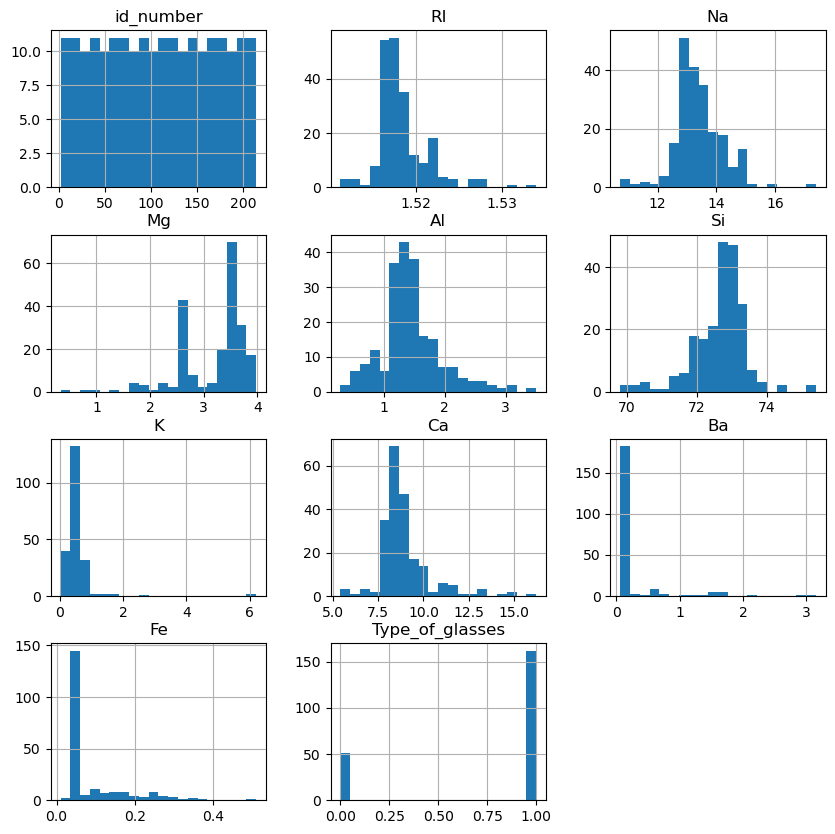

In [28]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Based on these observations, it can be concluded that while some variables display a relatively normal distribution, others left exhibit significant skewness.

In [29]:
df.columns

Index(['id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glasses'],
      dtype='object')

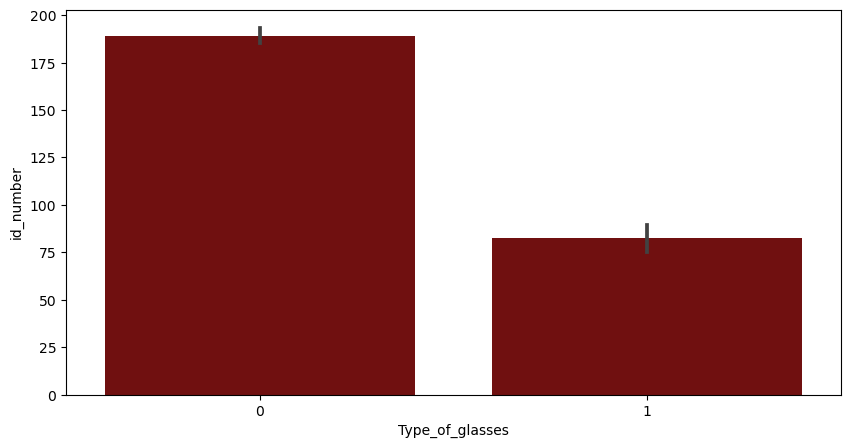

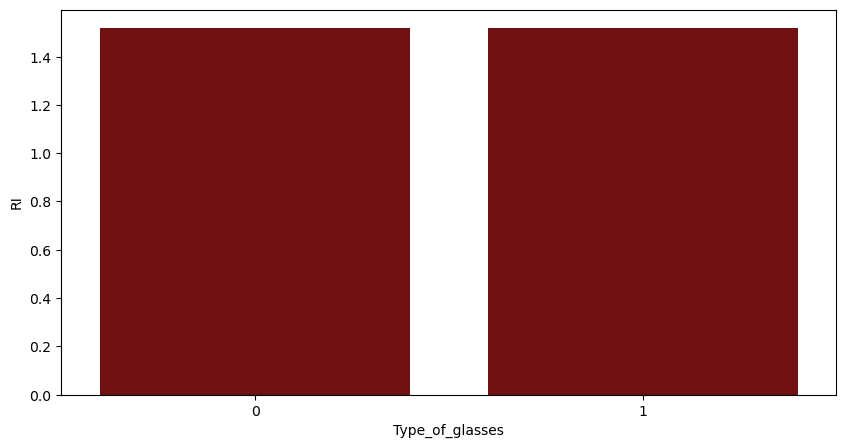

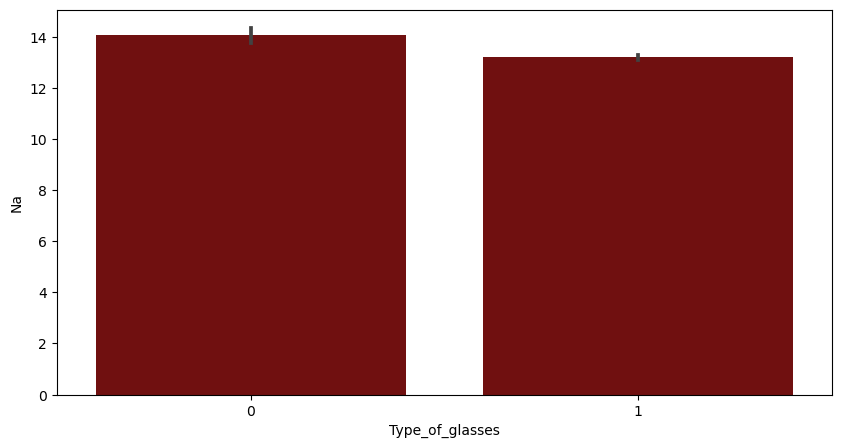

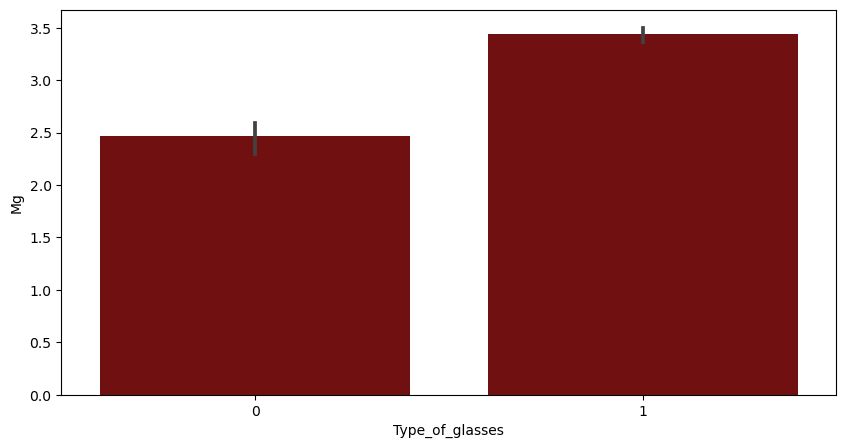

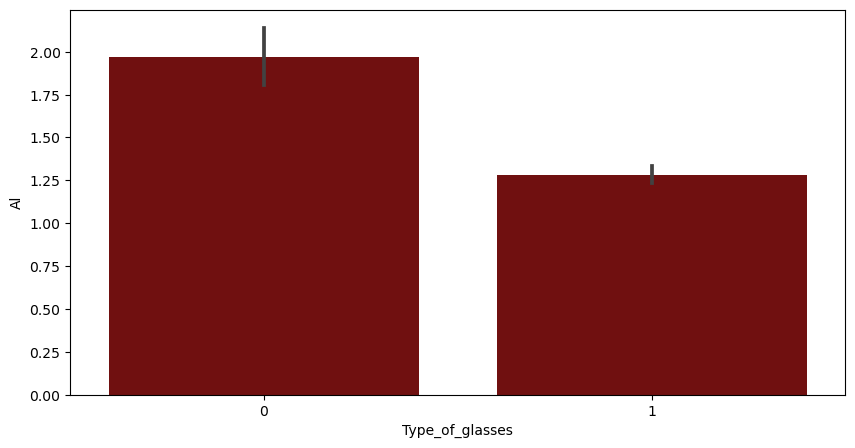

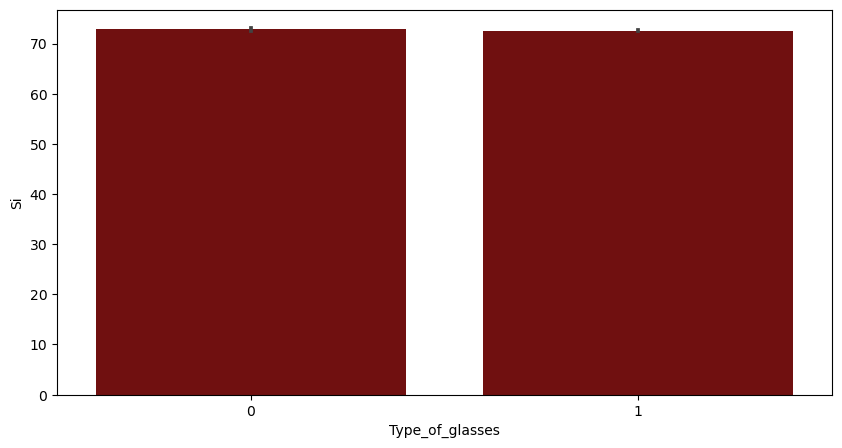

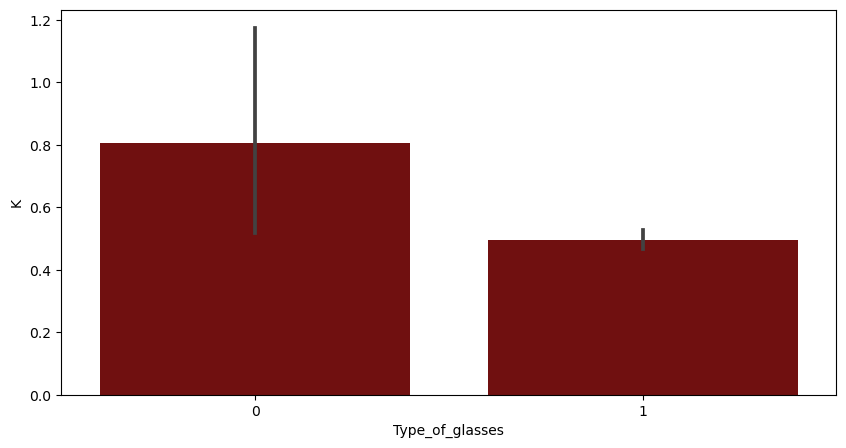

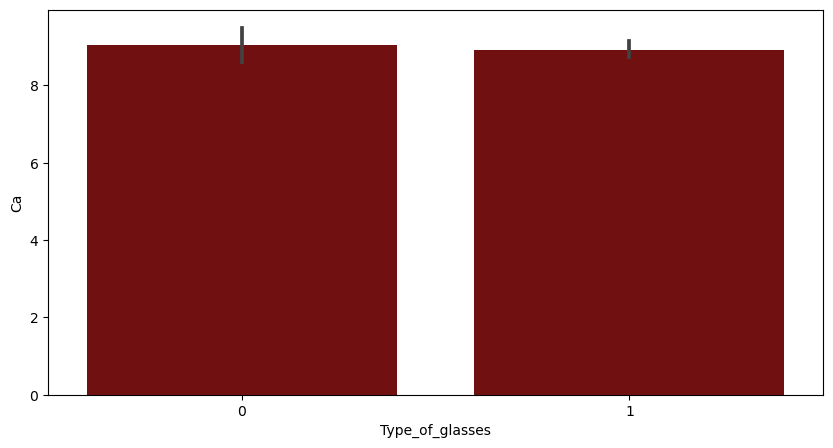

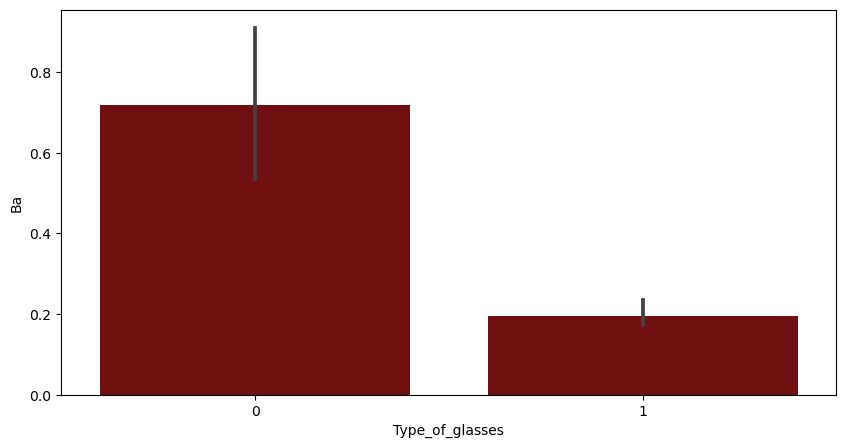

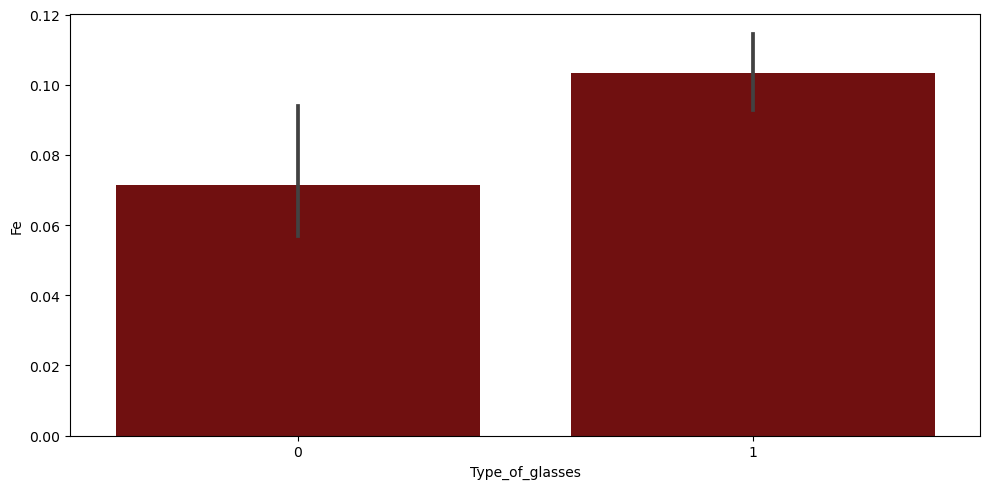

In [30]:
idx=0
labels = df['Type_of_glasses']
features = df.drop('Type_of_glasses', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[idx], data=df, color="maroon")
plt.tight_layout()
plt.show()

<Axes: xlabel='Type_of_glasses', ylabel='RI'>

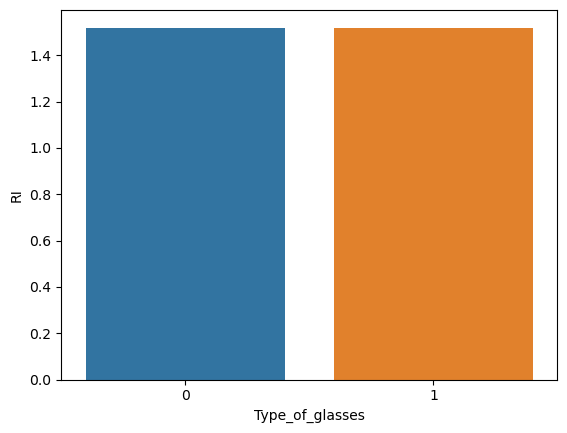

In [31]:
sns.barplot(x='Type_of_glasses',y='RI',data=df)

Both the window and non-window classes of glass exhibit an equal refractive index.

<Axes: xlabel='Type_of_glasses', ylabel='Na'>

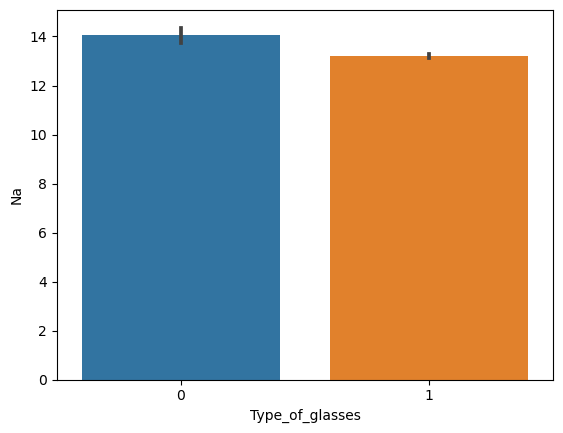

In [32]:
sns.barplot(x='Type_of_glasses',y='Na',data=df)

Non-window glass contains a higher amount of sodium compared to window glass.

<Axes: xlabel='Type_of_glasses', ylabel='Mg'>

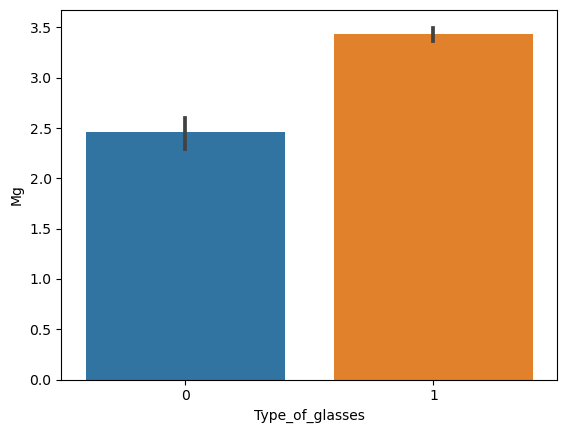

In [33]:
sns.barplot(x='Type_of_glasses',y='Mg',data=df)

Window glasses contain a higher amount of manganese compared to non-window glasses.

<Axes: xlabel='Type_of_glasses', ylabel='Al'>

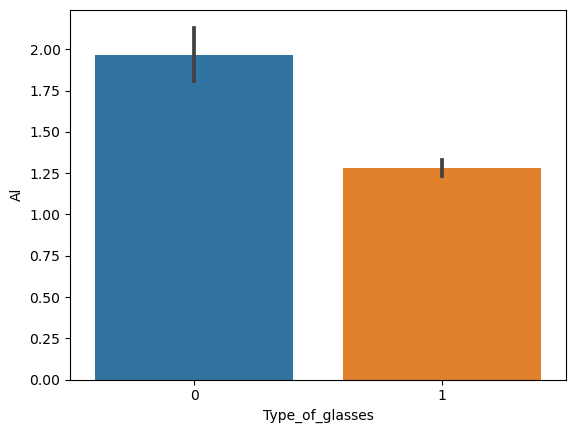

In [34]:
sns.barplot(x='Type_of_glasses',y='Al',data=df)

Non-window glasses contain a higher amount of aluminum compared to window glasses.

<Axes: xlabel='Type_of_glasses', ylabel='Si'>

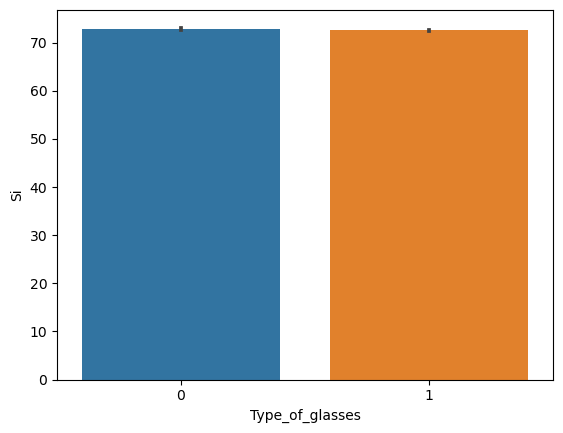

In [35]:
sns.barplot(x='Type_of_glasses',y='Si',data=df)

Both window and non-window glasses contain an equal amount of silicon.

<Axes: xlabel='Type_of_glasses', ylabel='K'>

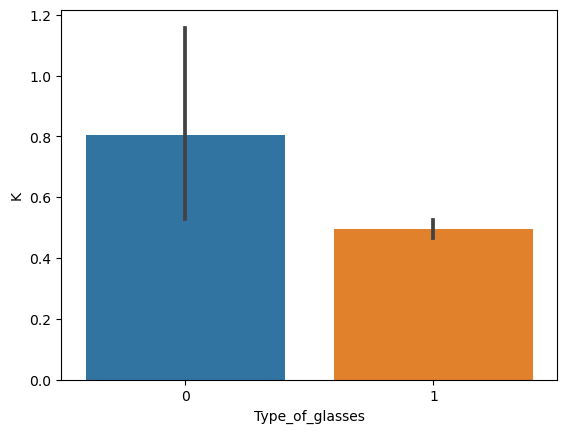

In [36]:
sns.barplot(x='Type_of_glasses',y='K',data=df)

Non-window glasses contain a higher amount of potassium compared to window glasses.

<Axes: xlabel='Type_of_glasses', ylabel='Ca'>

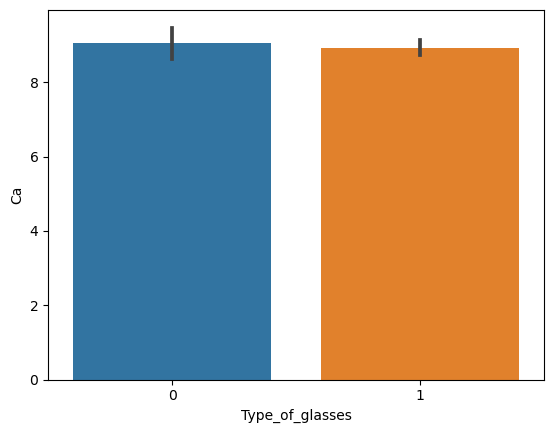

In [37]:
sns.barplot(x='Type_of_glasses',y='Ca',data=df)

Both window & non window glasses having equal amount of calcium.

<Axes: xlabel='Type_of_glasses', ylabel='Ba'>

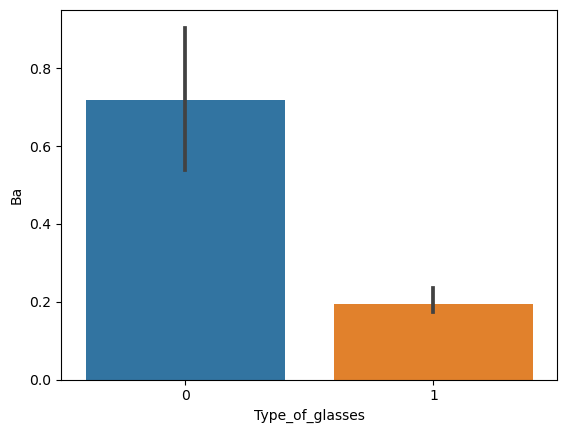

In [38]:
sns.barplot(x='Type_of_glasses',y='Ba',data=df)

Non-window glasses contain a higher amount of barium compared to window glasses.

<Axes: xlabel='Type_of_glasses', ylabel='Fe'>

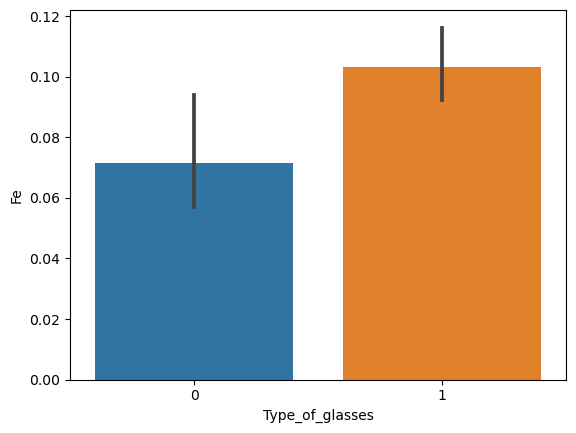

In [39]:
sns.barplot(x='Type_of_glasses',y='Fe',data=df)

Window glasses have higher amount of iron than the non window glasses.

# Bivariate analysis-
Bivariate analysis examines the relationship between two variables simultaneously. It aims to understand how changes in one variable affect the other. Techniques include scatter plots, correlation analysis, and regression analysis. Bivariate analysis helps uncover associations, dependencies, and patterns between two variables in a dataset.Bivariate analysis-

# Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

<Axes: >

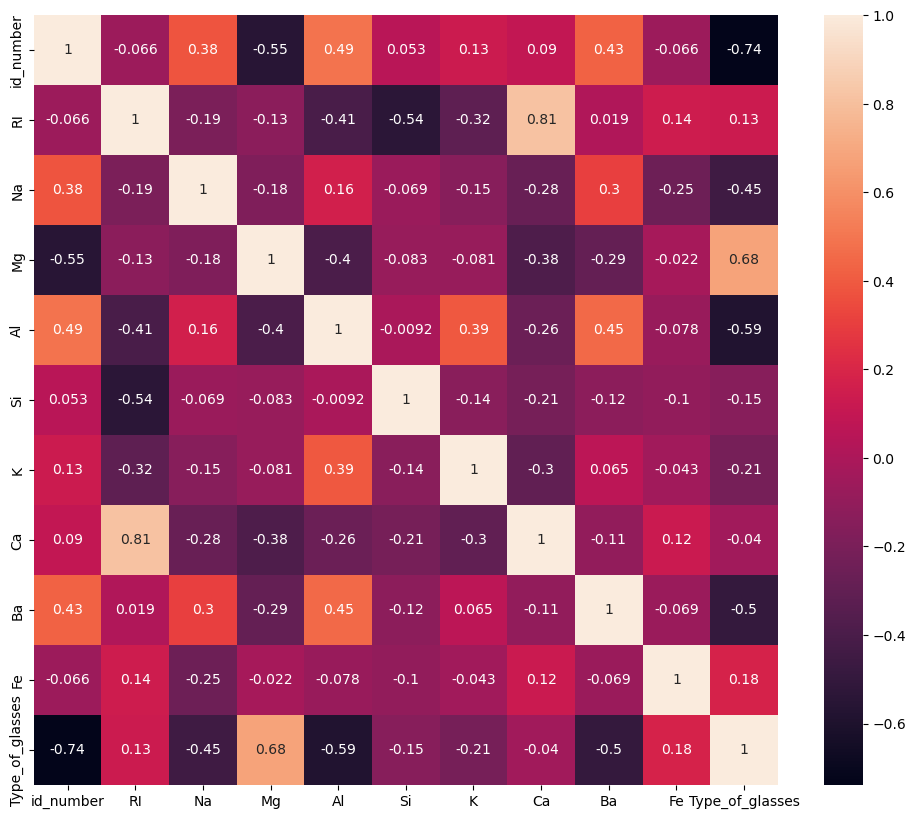

In [40]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)

observations:

1. There is a 56% relationship between the "id_number" and "Mg" variables.
2. There is a 74% correlation between the "id_number" and the target variable "Type_of_glasses".
3. There is an 81% correlation between "RI" and "Ca", indicating a very high correlation, which suggests the possibility of multicollinearity among features.
4. There is a 67% correlation between "Mg" and the target variable "Type_of_glasses".
5. There is a 59% correlation between "Al" and the target variable "Type_of_glasses".
6. There is a 54% correlation between "RI" and "Si".
7. There is a 50% correlation between "Ba" and the target variable "Type_of_glasses".

These observations provide insights into the relationships and correlations among different variables in the dataset. High correlations may indicate potential relationships or dependencies that could be further explored in the analysis. It's important to consider these findings when interpreting the data and building predictive models.

In [41]:
df.corr()['Type_of_glasses']

id_number         -0.739143
RI                 0.132368
Na                -0.453504
Mg                 0.676913
Al                -0.585198
Si                -0.145654
K                 -0.212538
Ca                -0.040319
Ba                -0.498563
Fe                 0.179069
Type_of_glasses    1.000000
Name: Type_of_glasses, dtype: float64

<Axes: >

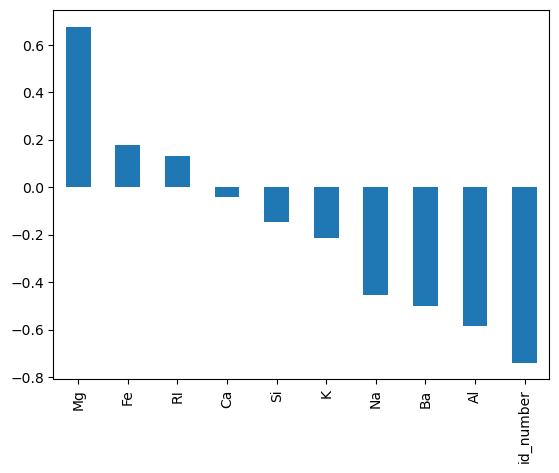

In [42]:
df.corr()['Type_of_glasses'].sort_values(ascending=False).drop(['Type_of_glasses']).plot(kind='bar')

Observations:

1. The 'id_number' exhibits the maximum correlation with the target variable, followed by manganese, aluminum, barium, and sodium.
2. In univariate analysis, it's observed that refractive index (Ri), calcium (Ca), and silicon (Si) have no impact on the target variable. This is because both window and non-window glasses have the same amount of refractive index, calcium, and silicon.

<Axes: xlabel='Si', ylabel='RI'>

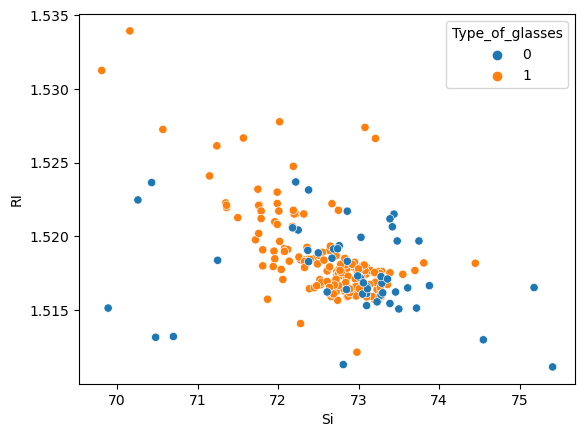

In [43]:
sns.scatterplot(x='Si',y='RI',data=df,hue='Type_of_glasses')

# swarm plot
A swarm plot is a categorical scatter plot that displays individual data points along a categorical axis, spreading them out to avoid overlap. It's useful for visualizing the distribution of data within categories and identifying outliers.

<Axes: xlabel='Type_of_glasses', ylabel='RI'>

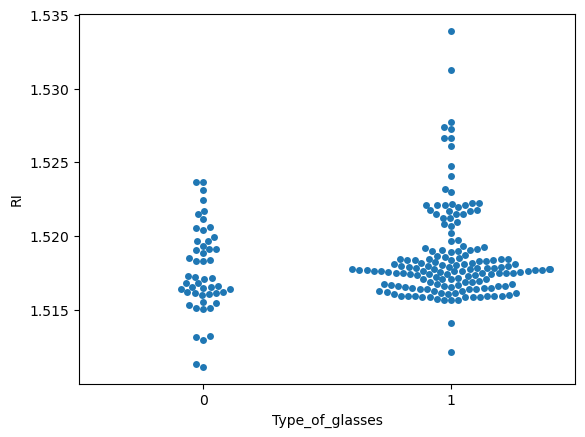

In [44]:
sns.swarmplot(x='Type_of_glasses',y='RI',data=df)

When the refractive index (RI) is low, there is a higher probability of the glass being classified as window glass.

<Axes: xlabel='Type_of_glasses', ylabel='Si'>

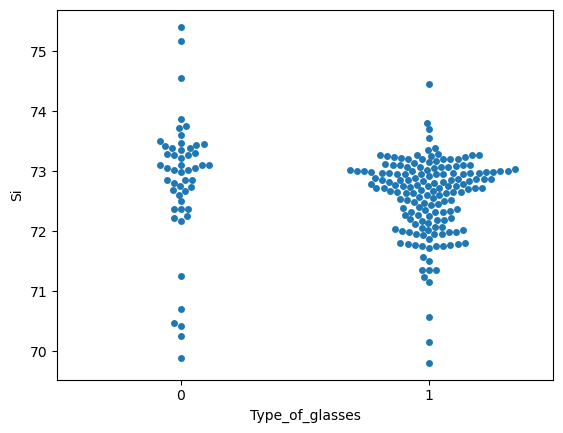

In [45]:
sns.swarmplot(x='Type_of_glasses',y='Si',data=df)

When the silicon content falls between 71.5 and 73.5, there is a higher likelihood of the glass being categorized as window glass.

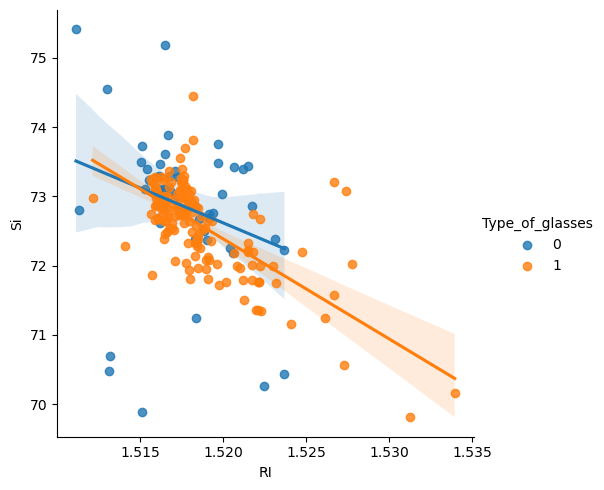

In [46]:
sns.lmplot(x='RI',y='Si',data=df,hue='Type_of_glasses')

The graph above clearly illustrates that silicon (Si) and refractive index (RI) are negatively correlated for both types of glasses, as also depicted in the heatmap where silicon and refractive index exhibit a negative correlation.

<Axes: xlabel='Type_of_glasses', ylabel='Al'>

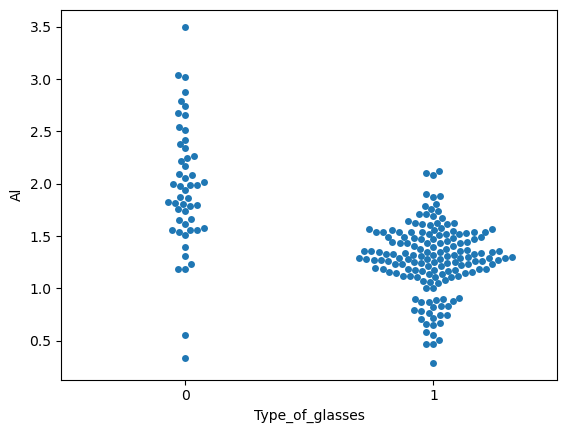

In [47]:
sns.swarmplot(x='Type_of_glasses',y='Al',data=df)

<Axes: xlabel='Type_of_glasses', ylabel='Si'>

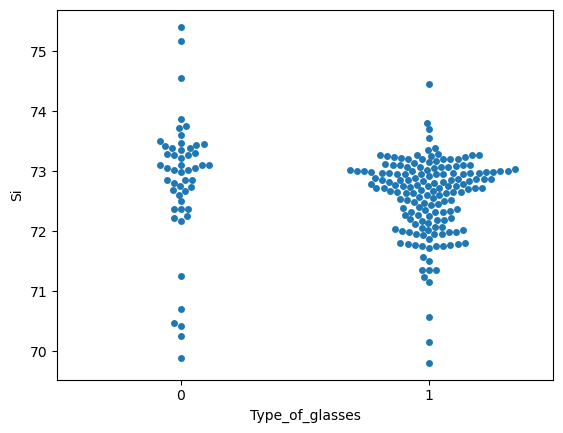

In [48]:
sns.swarmplot(x='Type_of_glasses',y='Si',data=df)

For window glasses, the quantity of aluminum will be lower, while for non-window glasses, the aluminum quantity will be higher.

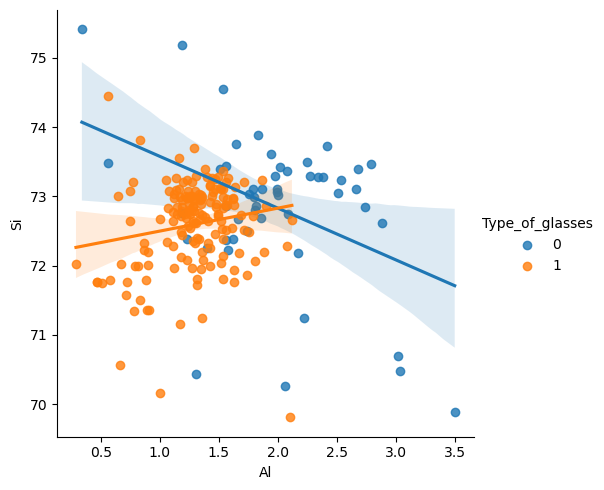

In [49]:
sns.lmplot(x='Al',y='Si',data=df,hue='Type_of_glasses')

For class 1 of glass the relationship bw silicon and aluminium is positive.

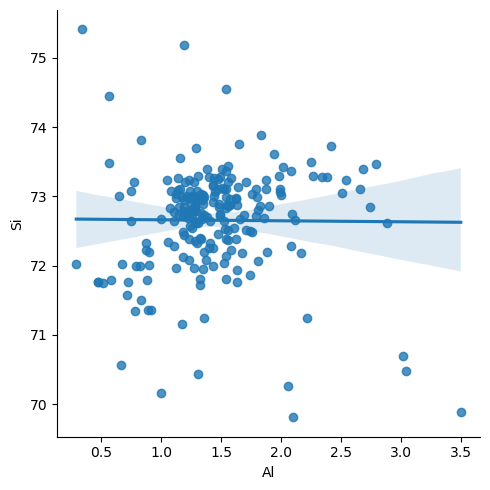

In [50]:
sns.lmplot(x='Al',y='Si',data=df)

It's evident that silicon and aluminum are negatively correlated with each other.

<Axes: xlabel='Type_of_glasses', ylabel='K'>

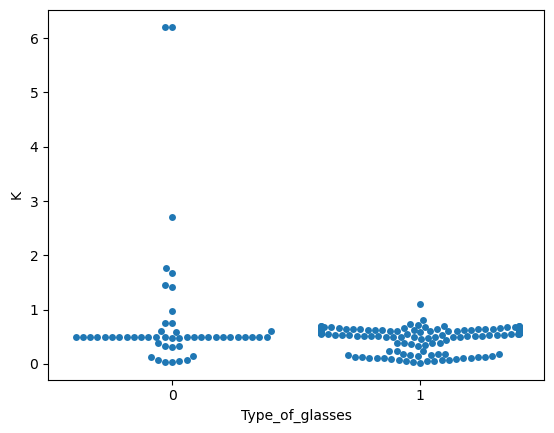

In [51]:
sns.swarmplot(x='Type_of_glasses',y='K',data=df)

When the potassium content is low, there is a higher probability of the glass being classified as window glass.

<Axes: xlabel='Type_of_glasses', ylabel='Ca'>

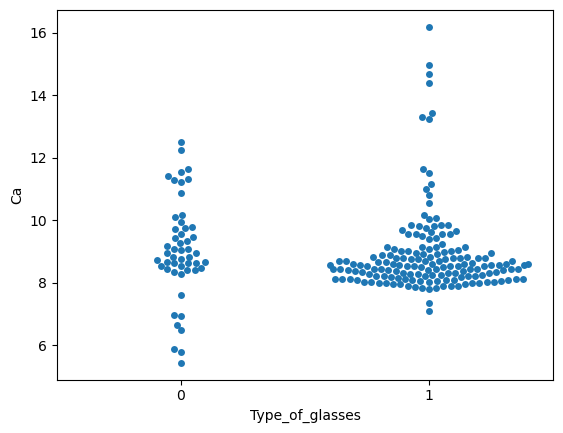

In [52]:
sns.swarmplot(x='Type_of_glasses',y='Ca',data=df)

when calcium is high in qty than there are more probability of glas to be window glass.

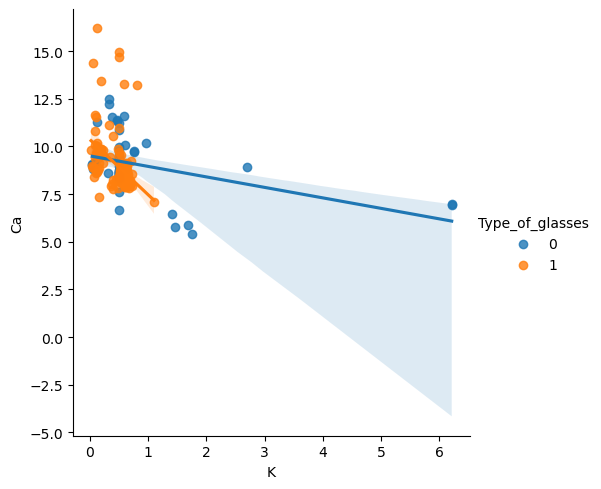

In [53]:
sns.lmplot(x='K',y='Ca',data=df,hue='Type_of_glasses')

It's evident from the graphs that calcium and potassium are negatively correlated with each other, a relationship also reflected in the heatmap where both calcium and potassium are shown to be negatively correlated.

<Axes: xlabel='Type_of_glasses', ylabel='Ba'>

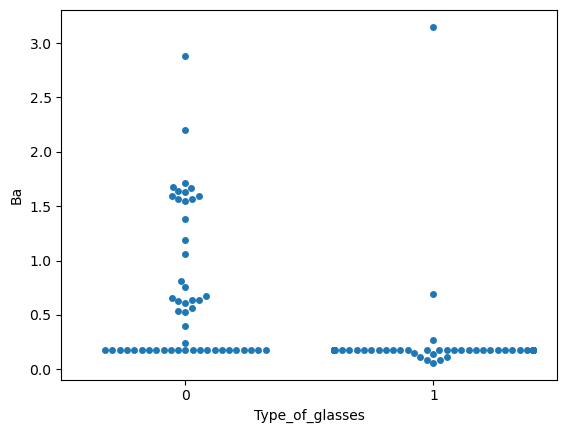

In [54]:
sns.swarmplot(x='Type_of_glasses',y='Ba',data=df)

When the barium content is high, there is a higher likelihood of the glass being classified as non-window glass. Conversely, in window glass, the barium content tends to be low.

<Axes: xlabel='Type_of_glasses', ylabel='Fe'>

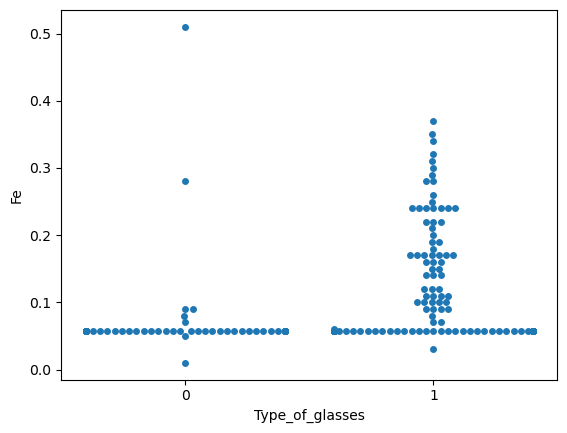

In [55]:
sns.swarmplot(x='Type_of_glasses',y='Fe',data=df)

When the quantity of iron is high, there is a greater likelihood of the glass being categorized as window glass. Conversely, in non-window glass, the iron content tends to be lower.

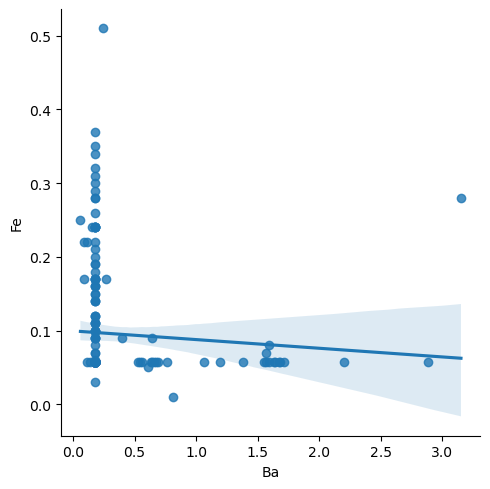

In [56]:
sns.lmplot(x='Ba',y='Fe',data=df)

so it can be clearly seen from the above graph that barium & iron are negetively correlated to each other as reptresented in heat map also.

<Axes: xlabel='Type_of_glasses', ylabel='Ca'>

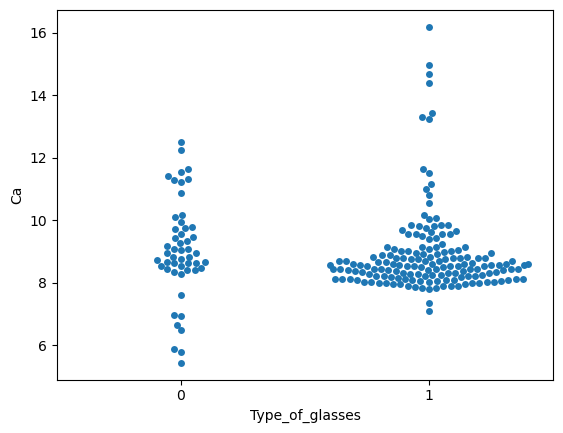

In [57]:
sns.swarmplot(x='Type_of_glasses',y='Ca',data=df)

When the calcium quantity is high, the likelihood of the glass being classified as window glass is also high. Conversely, when the calcium quantity is low, the likelihood of the glass being classified as non-window glass is high.

<Axes: xlabel='Type_of_glasses', ylabel='Mg'>

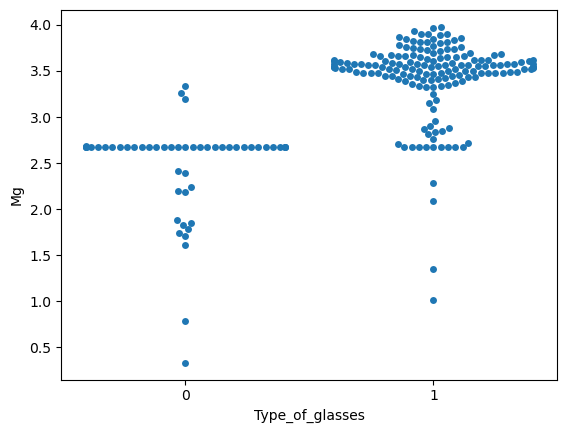

In [58]:
sns.swarmplot(x='Type_of_glasses',y='Mg',data=df)

When the quantity of manganese is high, the likelihood of the glass being classified as window glass is high. Conversely, when the quantity of manganese is low, the likelihood of the glass being classified as non-window glass is high.

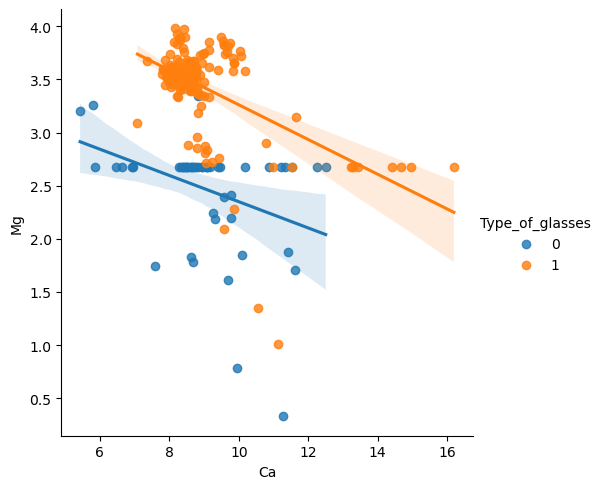

In [59]:
sns.lmplot(x='Ca',y='Mg',data=df,hue='Type_of_glasses')

It's evident from the graph above that manganese and calcium are negatively correlated with each other, a relationship also reflected in the heatmap.

<Axes: xlabel='Type_of_glasses', ylabel='Fe'>

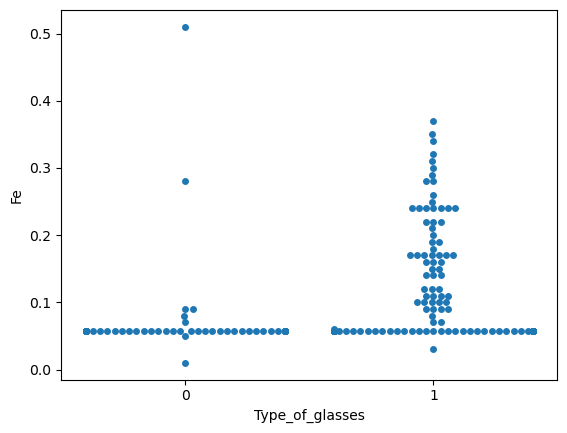

In [60]:
sns.swarmplot(x='Type_of_glasses',y='Fe',data=df)

When the quantity of iron is high, there is a higher probability of the glass being classified as window glass. Conversely, in non-window glass, the iron content tends to be lower.

<Axes: xlabel='Type_of_glasses', ylabel='Si'>

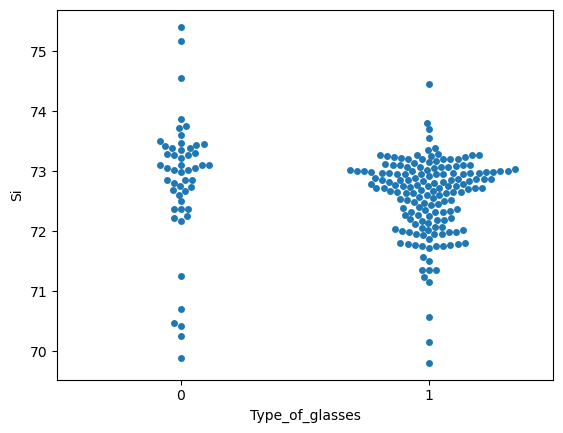

In [61]:
sns.swarmplot(x='Type_of_glasses',y='Si',data=df)

For window glasses, the quantity of aluminum will be lower, while for non-window glasses, the aluminum quantity will be higher.

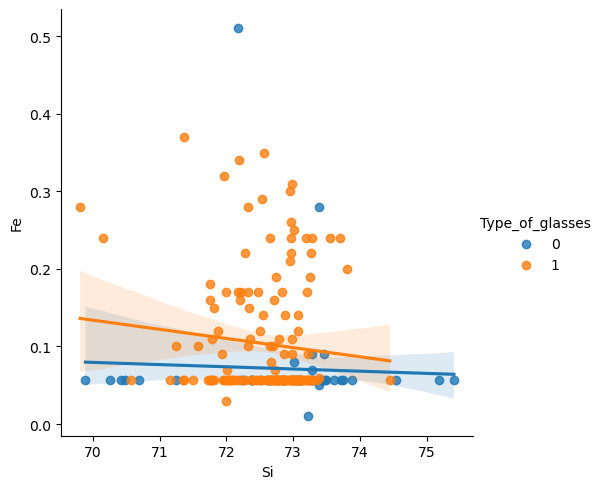

In [62]:
sns.lmplot(x='Si',y='Fe',data=df,hue='Type_of_glasses')

It's evident from the graph above that in window glass, the iron quantity is high while the silicon quantity is low. Furthermore, both silicon and iron are negatively correlated with each other.

<Axes: xlabel='Type_of_glasses', ylabel='Na'>

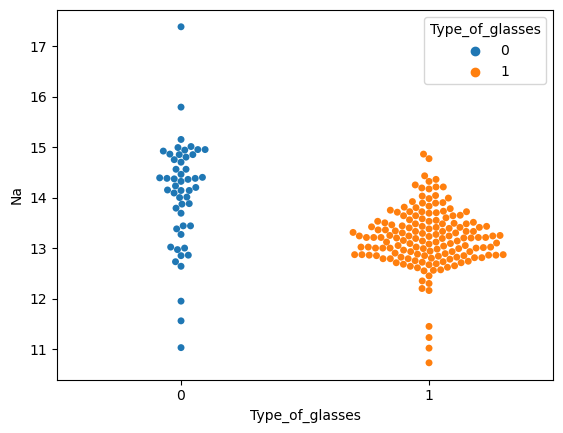

In [63]:
sns.swarmplot(x='Type_of_glasses',y='Na',data=df,hue='Type_of_glasses')

When the quantity of sodium is high, there is a higher probability of the glass being classified as non-window glass. Conversely, when the quantity of sodium is low, there is a higher probability of the glass being classified as window glass.

In [64]:
df.groupby('Type_of_glasses')[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].mean()



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type_of_glasses,,,,,,,,,
0,1.517638,14.066667,2.465291,1.966667,72.855490,0.804269,9.060196,0.718529,0.071430
1,1.518578,13.199012,3.436201,1.282778,72.591914,0.495466,8.925741,0.195012,0.103381


From the above graphs and data visualizations, we can summarize the observations as follows:

- For window glass, the quantities of manganese and iron are higher.
- For non-window glass, the quantities of sodium, aluminum, silicon, potassium, calcium, and barium are higher.

In [65]:
df=df.drop(columns=['id_number'],axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
0,1.51761,13.89,3.600000,1.36,72.73,0.480000,7.83,0.175869,0.057277,1
1,1.51618,13.53,3.550000,1.54,72.99,0.390000,7.78,0.175869,0.057277,1
2,1.51766,13.21,3.690000,1.29,72.61,0.570000,8.22,0.175869,0.057277,1
3,1.51742,13.27,3.620000,1.24,73.08,0.550000,8.07,0.175869,0.057277,1
4,1.51596,12.79,3.610000,1.62,72.97,0.640000,8.07,0.175869,0.260000,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,2.676056,2.88,72.61,0.080000,9.18,1.060000,0.057277,0
209,1.51685,14.92,2.676056,1.99,73.06,0.499108,8.40,1.590000,0.057277,0
210,1.52065,14.36,2.676056,2.02,73.42,0.499108,8.44,1.640000,0.057277,0
211,1.51651,14.38,2.676056,1.94,73.61,0.499108,8.48,1.570000,0.057277,0


In [66]:
df.corr()['Type_of_glasses'].sort_values(ascending=False)

Type_of_glasses    1.000000
Mg                 0.676913
Fe                 0.179069
RI                 0.132368
Ca                -0.040319
Si                -0.145654
K                 -0.212538
Na                -0.453504
Ba                -0.498563
Al                -0.585198
Name: Type_of_glasses, dtype: float64

<Axes: >

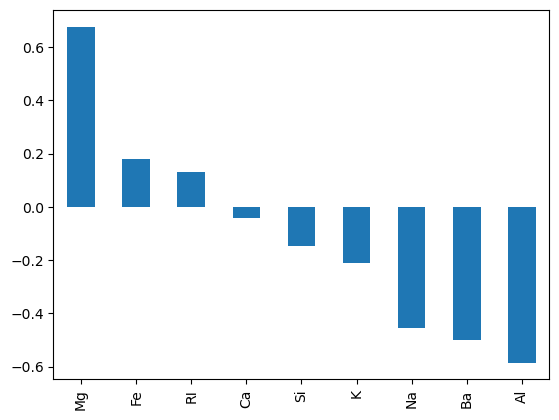

In [67]:
df.corr()['Type_of_glasses'].sort_values(ascending=False).drop(['Type_of_glasses']).plot(kind='bar')

Based on the observation that calcium (4%), refractive index (13%), and silicon (14%) are the least correlated with the target variable, you plan to create two models. In the first model, you'll include all features, while in the second model, you'll drop these three least correlated columns. This approach will help assess the impact of these features on the model's performance.

# Multivariate analysis-
Multivariate analysis involves examining relationships among multiple variables simultaneously. It aims to understand complex interactions and patterns within data by analyzing the joint variation of two or more variables. This analysis can include techniques like regression analysis, principal component analysis (PCA), factor analysis, and clustering. Its purpose is to gain insights into the underlying structure of data and to make predictions or classifications based on multiple variables.

In [68]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
0,1.51761,13.89,3.600000,1.36,72.73,0.480000,7.83,0.175869,0.057277,1
1,1.51618,13.53,3.550000,1.54,72.99,0.390000,7.78,0.175869,0.057277,1
2,1.51766,13.21,3.690000,1.29,72.61,0.570000,8.22,0.175869,0.057277,1
3,1.51742,13.27,3.620000,1.24,73.08,0.550000,8.07,0.175869,0.057277,1
4,1.51596,12.79,3.610000,1.62,72.97,0.640000,8.07,0.175869,0.260000,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,2.676056,2.88,72.61,0.080000,9.18,1.060000,0.057277,0
209,1.51685,14.92,2.676056,1.99,73.06,0.499108,8.40,1.590000,0.057277,0
210,1.52065,14.36,2.676056,2.02,73.42,0.499108,8.44,1.640000,0.057277,0
211,1.51651,14.38,2.676056,1.94,73.61,0.499108,8.48,1.570000,0.057277,0


# pairplot

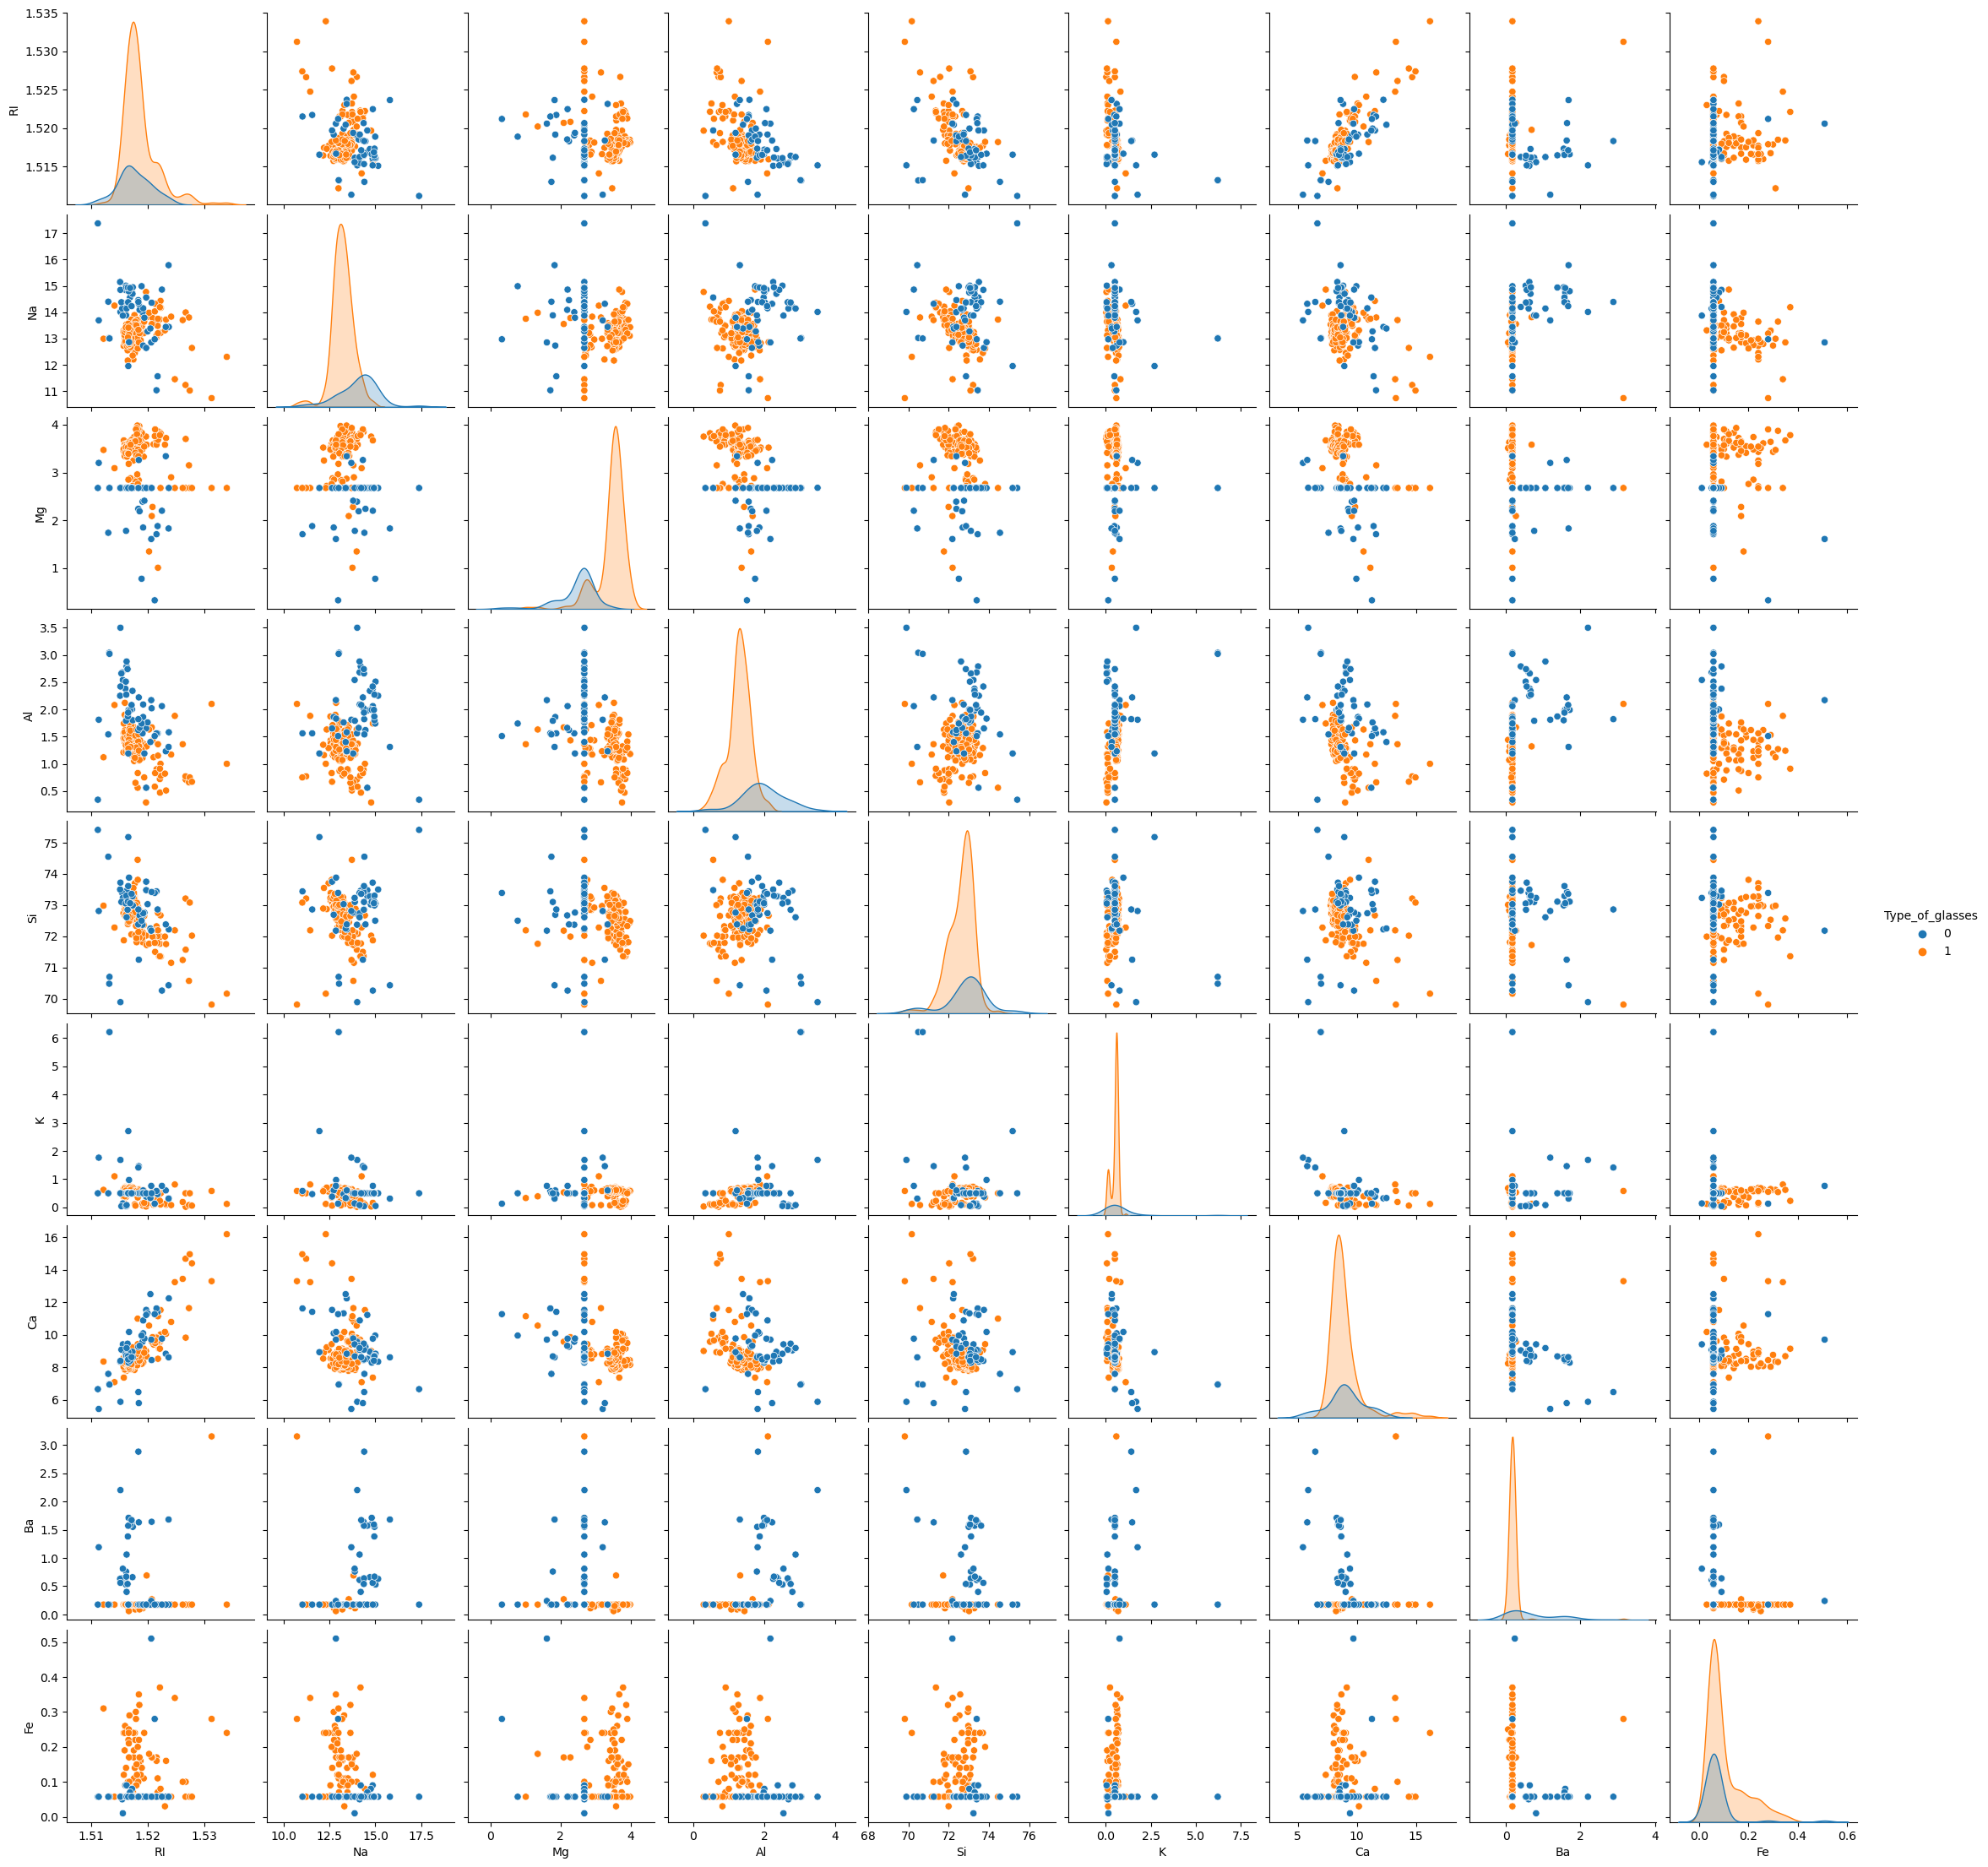

In [69]:
sns.pairplot(df,hue='Type_of_glasses')
plt.show()

Observations:

1. Negative correlation is observed between refractive index and sodium.
2. Negative correlation is observed between refractive index and manganese.
3. There is a strong negative correlation between refractive index and aluminum.
4. There is a strong negative correlation between refractive index and silicon.
5. Negative correlation is observed between refractive index and potassium.
6. There is a strong positive correlation between refractive index and calcium.
7. Positive correlation is observed between refractive index and barium.
8. Positive correlation is observed between refractive index and iron.
9. Negative correlation is observed between sodium and manganese.
10. Positive correlation is observed between sodium and aluminum.
11. Negative correlation is observed between sodium and silicon.
12. Negative correlation is observed between sodium and potassium.
13. Negative correlation is observed between sodium and calcium.
14. Positive correlation is observed between sodium and barium.
15. Negative correlation is observed between sodium and iron.

In [70]:
x=df.drop(columns=['Type_of_glasses'],axis=1)
y=df['Type_of_glasses']

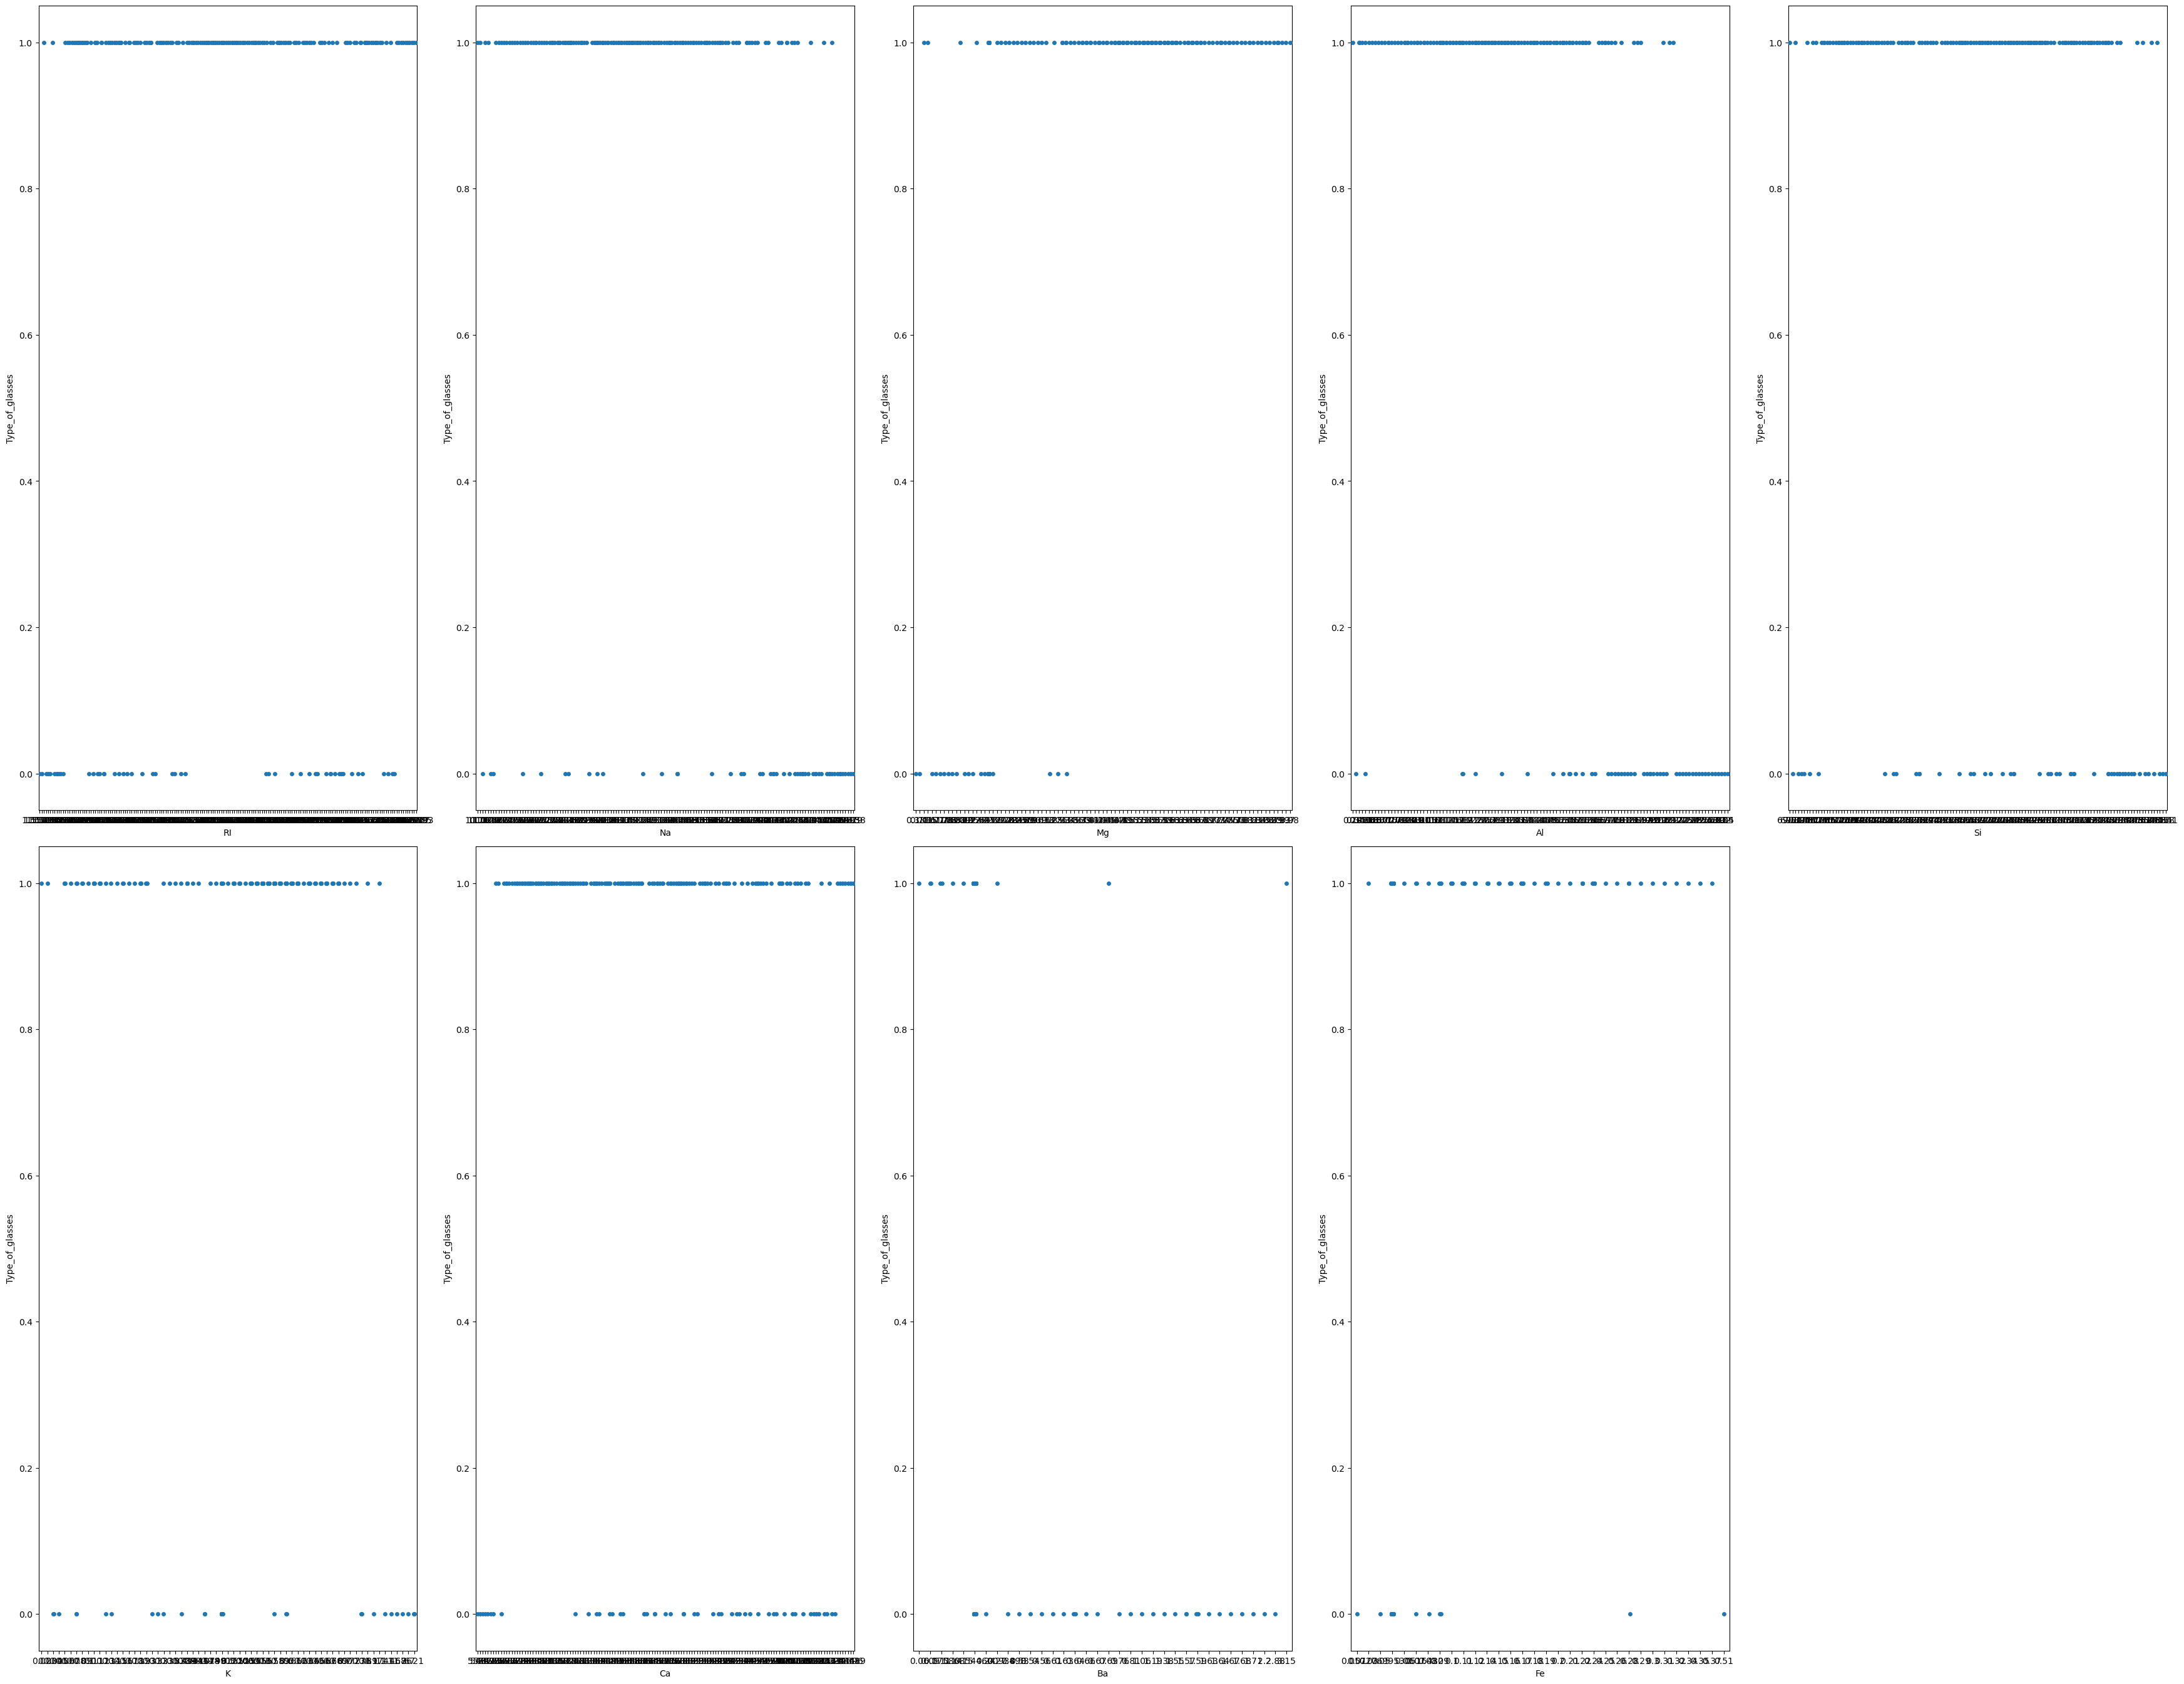

In [80]:
plt.figure(figsize=(35, 40))
plotnumber = 1

for column in x.columns:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.stripplot(x=x[column], y=y, ax=ax)  # Providing x and y explicitly as keyword arguments
        
    plotnumber += 1

plt.tight_layout()
plt.show()




Observations:

1. For window glass, the quantities of manganese and iron are higher.
2. For non-window glass, the quantities of sodium, aluminum, silicon, potassium, calcium, and barium are higher.

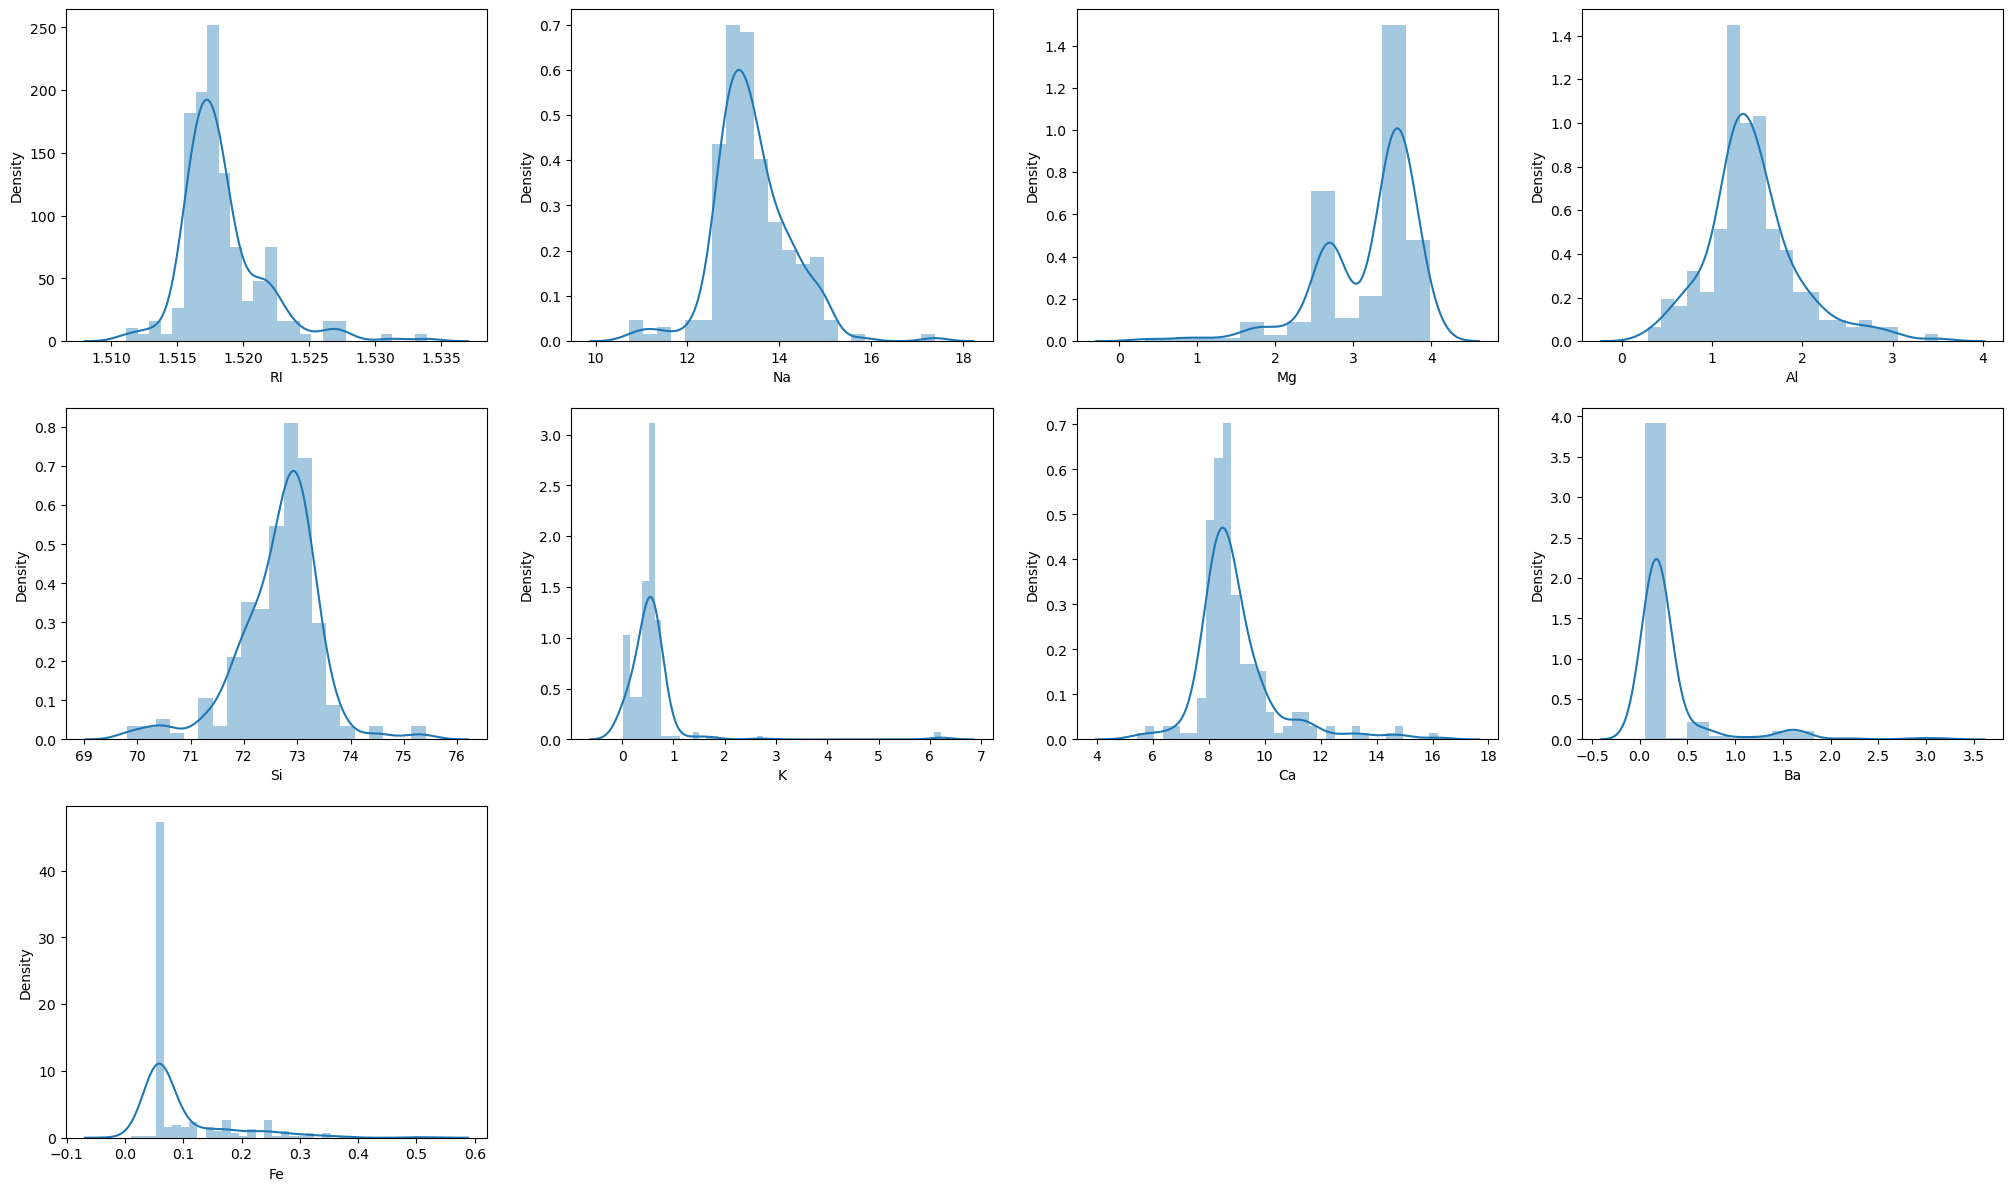

In [81]:
plt.figure(figsize=(25,25))  
plotnumber=1

for col in x:
    if plotnumber<=10:
        ax=plt.subplot(5,4,plotnumber)   
        sns.distplot(x[col])  
        plt.xlabel(col)
    plotnumber+=1
plt.show() 

In [82]:
df.skew()

RI                 1.639658
Na                 0.457318
Mg                -1.593298
Al                 0.900017
Si                -0.744546
K                  7.328321
Ca                 2.040591
Ba                 3.692318
Fe                 2.284710
Type_of_glasses   -1.229860
dtype: float64

The data are skewed in almost all the columns.

In [83]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
0,1.51761,13.89,3.600000,1.36,72.73,0.480000,7.83,0.175869,0.057277,1
1,1.51618,13.53,3.550000,1.54,72.99,0.390000,7.78,0.175869,0.057277,1
2,1.51766,13.21,3.690000,1.29,72.61,0.570000,8.22,0.175869,0.057277,1
3,1.51742,13.27,3.620000,1.24,73.08,0.550000,8.07,0.175869,0.057277,1
4,1.51596,12.79,3.610000,1.62,72.97,0.640000,8.07,0.175869,0.260000,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,2.676056,2.88,72.61,0.080000,9.18,1.060000,0.057277,0
209,1.51685,14.92,2.676056,1.99,73.06,0.499108,8.40,1.590000,0.057277,0
210,1.52065,14.36,2.676056,2.02,73.42,0.499108,8.44,1.640000,0.057277,0
211,1.51651,14.38,2.676056,1.94,73.61,0.499108,8.48,1.570000,0.057277,0


# Skewness removal through power transformation method-

In [84]:
from sklearn.preprocessing import PowerTransformer

In [85]:
features=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
x=PowerTransformer(method='yeo-johnson') 
df[features]=x.fit_transform(df[features].values)
df[features]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-2.081668e-17,0.616990,0.685481,-0.081445,0.038252,0.014918,-0.882521,-0.302429,-0.570628
1,-6.245005e-17,0.184792,0.546291,0.286720,0.394607,-0.331896,-0.936107,-0.302429,-0.570628
2,-2.081668e-17,-0.210310,0.950135,-0.232162,-0.121300,0.318201,-0.487918,-0.302429,-0.570628
3,-2.775558e-17,-0.135420,0.742704,-0.342629,0.521438,0.254153,-0.634960,-0.302429,-0.570628
4,-6.938894e-17,-0.745389,0.713981,0.442150,0.366668,0.528867,-0.634960,-0.302429,1.869530
...,...,...,...,...,...,...,...,...,...
208,-6.245005e-17,0.909819,-1.140907,2.415518,-0.121300,-2.023889,0.333739,2.373630,-0.570628
209,-4.510281e-17,1.787436,-1.140907,1.104938,0.493096,0.082665,-0.318743,2.393978,-0.570628
210,6.938894e-17,1.162750,-1.140907,1.155073,1.017262,0.082665,-0.282179,2.394491,-0.570628
211,-5.204170e-17,1.185528,-1.140907,1.020265,1.306184,0.082665,-0.245979,2.393745,-0.570628


In [86]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glasses
0,-2.081668e-17,0.616990,0.685481,-0.081445,0.038252,0.014918,-0.882521,-0.302429,-0.570628,1
1,-6.245005e-17,0.184792,0.546291,0.286720,0.394607,-0.331896,-0.936107,-0.302429,-0.570628,1
2,-2.081668e-17,-0.210310,0.950135,-0.232162,-0.121300,0.318201,-0.487918,-0.302429,-0.570628,1
3,-2.775558e-17,-0.135420,0.742704,-0.342629,0.521438,0.254153,-0.634960,-0.302429,-0.570628,1
4,-6.938894e-17,-0.745389,0.713981,0.442150,0.366668,0.528867,-0.634960,-0.302429,1.869530,1
...,...,...,...,...,...,...,...,...,...,...
208,-6.245005e-17,0.909819,-1.140907,2.415518,-0.121300,-2.023889,0.333739,2.373630,-0.570628,0
209,-4.510281e-17,1.787436,-1.140907,1.104938,0.493096,0.082665,-0.318743,2.393978,-0.570628,0
210,6.938894e-17,1.162750,-1.140907,1.155073,1.017262,0.082665,-0.282179,2.394491,-0.570628,0
211,-5.204170e-17,1.185528,-1.140907,1.020265,1.306184,0.082665,-0.245979,2.393745,-0.570628,0


In [87]:
x=df.drop(columns=['Type_of_glasses'],axis=1)
y=df['Type_of_glasses']

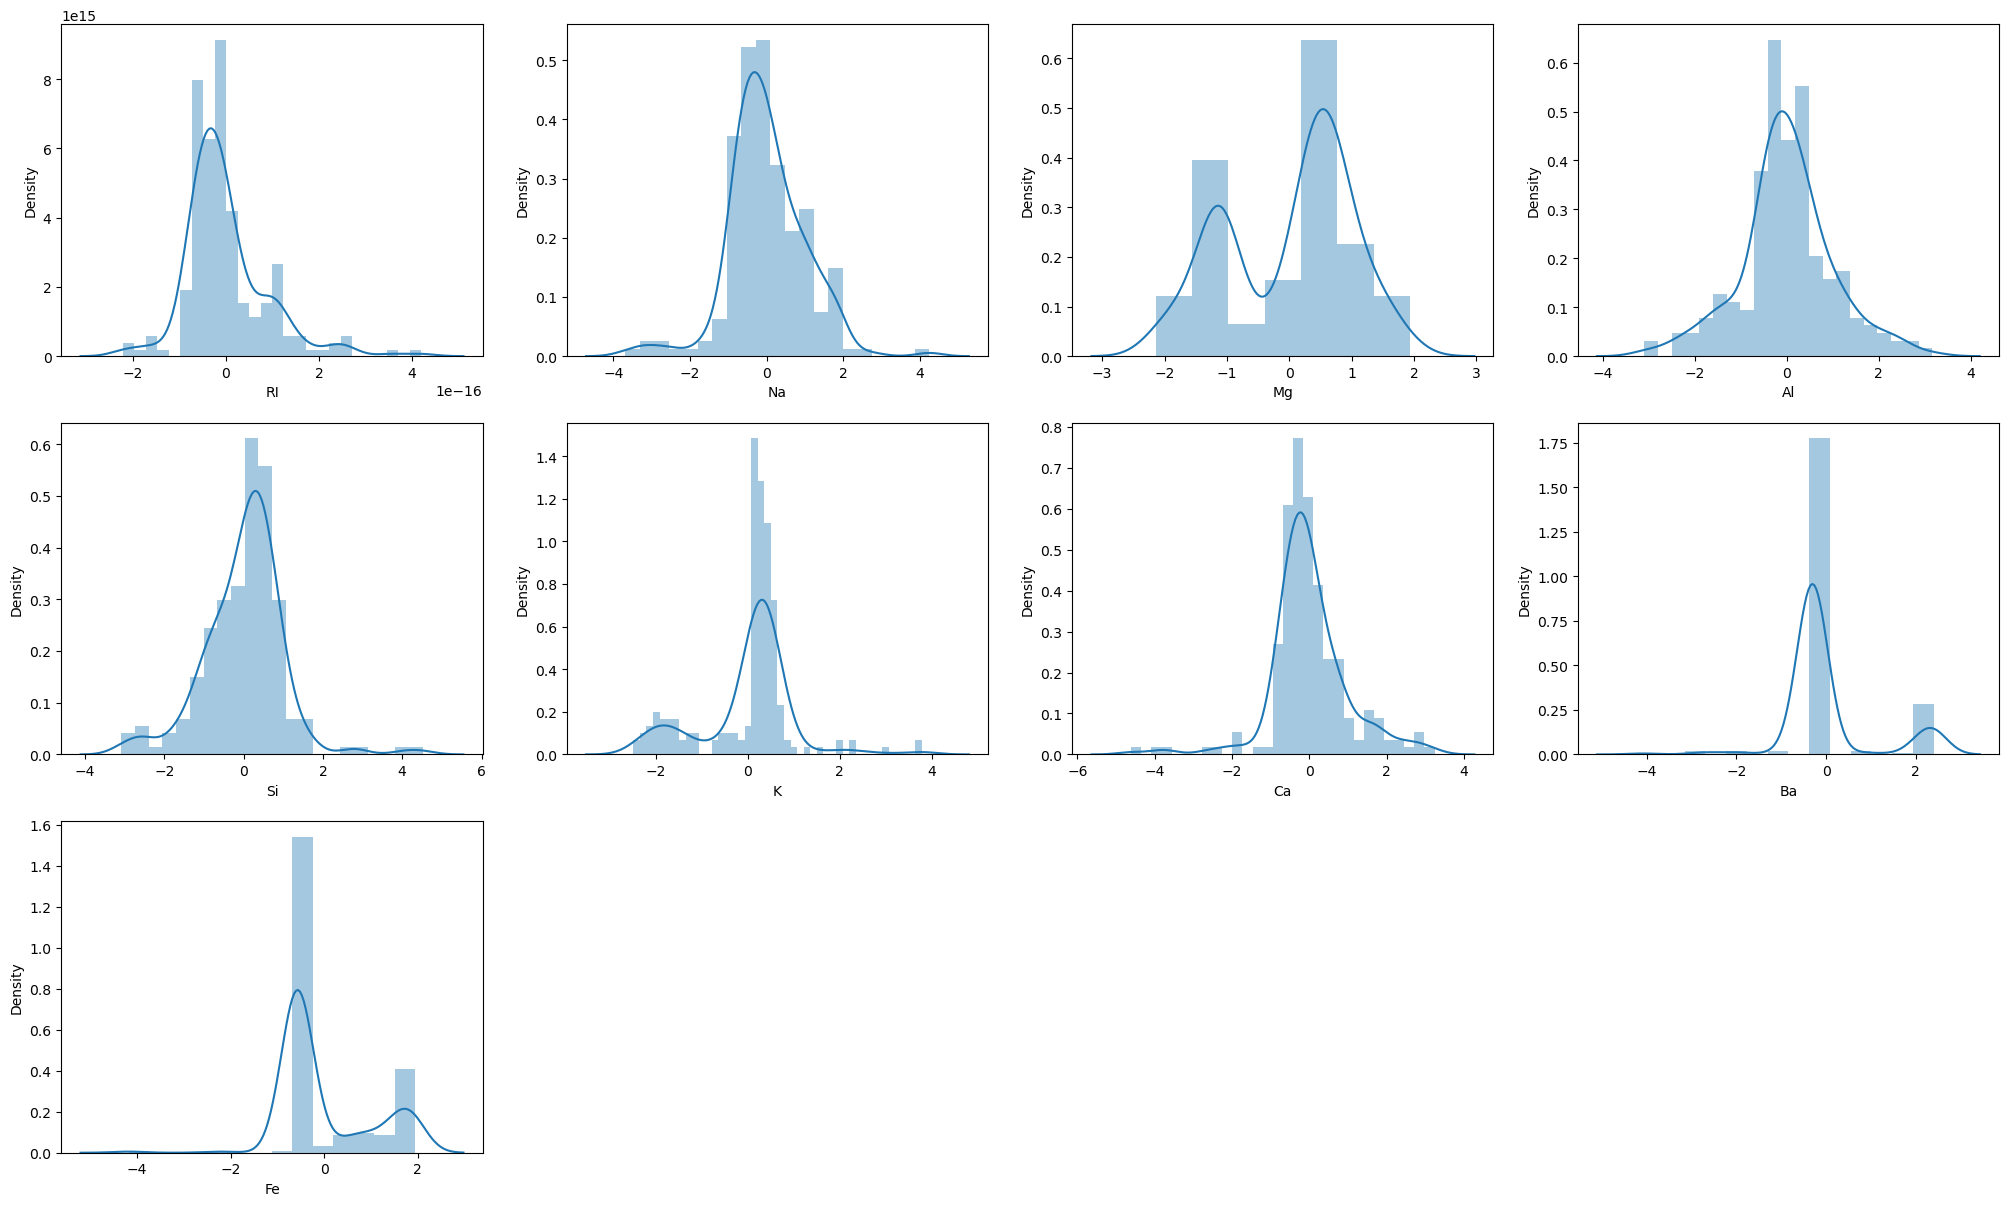

In [88]:
plt.figure(figsize=(25,25))  
plotnumber=1

for col in x:
    if plotnumber<=10:
        ax=plt.subplot(5,4,plotnumber)   
        sns.distplot(x[col])  
        plt.xlabel(col)
    plotnumber+=1
plt.show() 


In [89]:
df.skew()

RI                 0.000000
Na                -0.009526
Mg                -0.372164
Al                 0.000874
Si                 0.133867
K                 -0.247528
Ca                -0.207808
Ba                 1.074926
Fe                 0.611737
Type_of_glasses   -1.229860
dtype: float64

# outliers-

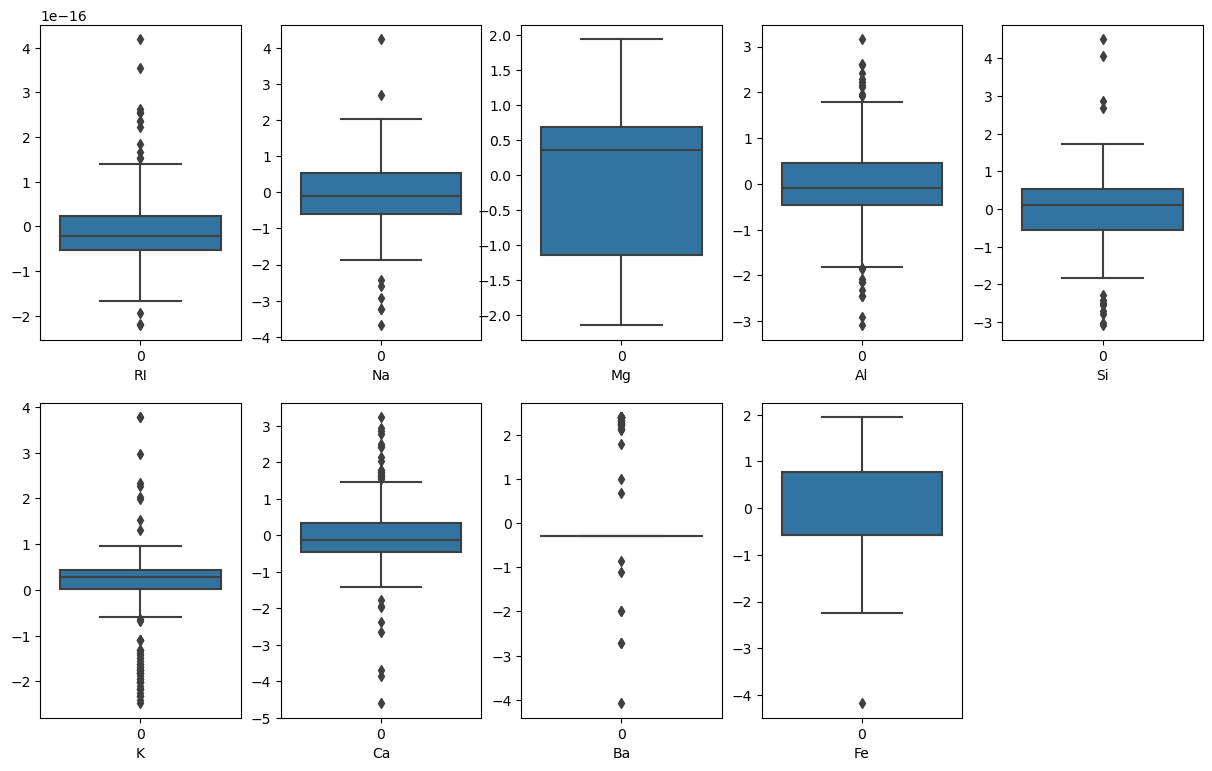

In [90]:
plt.figure(figsize=(15,9))
plotnumber=1

for i in x.columns:
    if plotnumber<=11:
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()    

Outliers are evident in all the columns.

# Outlier removal

In [91]:
df.shape

(213, 10)

In [92]:
z=np.abs(zscore(x))
z.shape

(213, 9)

In [93]:
threshold=3
print(np.where(z>3))

(array([ 20, 105, 105, 105, 106, 106, 110, 111, 141, 162, 162, 162, 165,
       170, 171, 183, 183, 184, 185, 195, 200], dtype=int64), array([3, 0, 1, 4, 0, 6, 1, 0, 7, 3, 4, 6, 1, 5, 5, 1, 4, 6, 6, 8, 4],
      dtype=int64))


In [94]:
df=df[(z<3).all(axis=1)]
print(df.shape)

(198, 10)


Z-score method to remove outliers from our dataset that fall outside the acceptable range of +/-0.5 skewness value.

In [95]:
# Percentage of Data Loss

data_loss=(213-198)/213*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

7.042253521126761

After removing the outliers, we're assessing the data loss percentage by comparing the number of rows in our original dataset with the new dataset after outlier removal. The data loss percentage should not exceed 10 percent.

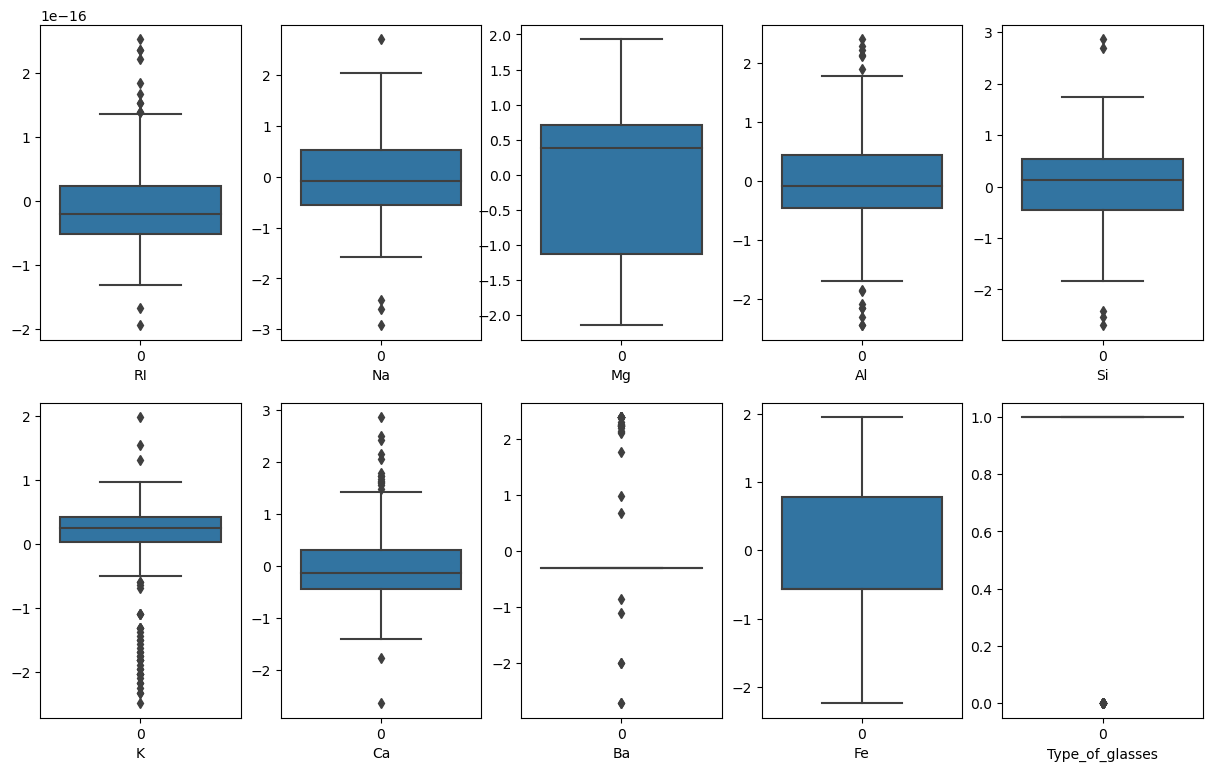

In [96]:
plt.figure(figsize=(15,9))
plotnumber=1

for i in df.columns:
    if plotnumber<=11:
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

checking for multicollinearity-

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,6.092288,RI
1,1.954706,Na
2,2.520055,Mg
3,2.240943,Al
4,1.191964,Si
5,2.337574,K
6,3.167615,Ca
7,1.917881,Ba
8,1.098797,Fe


There doesn't appear to be any significant multicollinearity among the features.

In [98]:
df.corr()['Type_of_glasses']

RI                 0.016943
Na                -0.524698
Mg                 0.720167
Al                -0.556707
Si                -0.221622
K                  0.071009
Ca                -0.235518
Ba                -0.657513
Fe                 0.216147
Type_of_glasses    1.000000
Name: Type_of_glasses, dtype: float64

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables.

In [99]:
X = df.drop('Type_of_glasses', axis=1)
Y = df['Type_of_glasses']

I've split the dataset into features and labels, with X representing all the feature columns and Y representing the target label column.

# Taking care of class imbalance

In [100]:
Y.value_counts()

Type_of_glasses
1    156
0     42
Name: count, dtype: int64

I'm listing the values in our label column to count the number of rows for each category. This will show if there's class imbalance, which we'll address using oversampling.

In [101]:
# We're adding samples to ensure an equal number of instances for all categorical quality values.
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

We're employing the SMOTE oversampling method to balance the distribution of categories within our target label, ensuring each category has an equal number of instances.

In [102]:
Y.value_counts()

Type_of_glasses
1    156
0    156
Name: count, dtype: int64

Now, we can observe that we have successfully addressed the class imbalance issue, with all categories having the same amount of data.

In [103]:
Y # Displaying just the label

0      1
1      1
2      1
3      1
4      1
      ..
307    0
308    0
309    0
310    0
311    0
Name: Type_of_glasses, Length: 312, dtype: int64

In [104]:
X 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-2.081668e-17,0.616990,0.685481,-0.081445,0.038252,0.014918,-0.882521,-0.302429,-0.570628
1,-6.245005e-17,0.184792,0.546291,0.286720,0.394607,-0.331896,-0.936107,-0.302429,-0.570628
2,-2.081668e-17,-0.210310,0.950135,-0.232162,-0.121300,0.318201,-0.487918,-0.302429,-0.570628
3,-2.775558e-17,-0.135420,0.742704,-0.342629,0.521438,0.254153,-0.634960,-0.302429,-0.570628
4,-6.938894e-17,-0.745389,0.713981,0.442150,0.366668,0.528867,-0.634960,-0.302429,1.869530
...,...,...,...,...,...,...,...,...,...
307,-4.661138e-17,1.446964,-1.140907,1.091773,0.767907,0.082665,-0.258081,2.394033,-0.161306
308,-4.509503e-17,1.787297,-1.140907,1.104950,0.493054,0.082665,-0.318655,2.393978,-0.569990
309,1.267123e-16,2.595480,-1.760399,-0.053053,-2.154291,-0.588898,-0.124300,2.394286,-0.570628
310,1.130750e-16,0.014852,-0.311558,-0.060640,-0.170945,0.287799,0.506423,-0.302429,-0.570628


# Feature Scaling

In [105]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.249015,0.283019,1.076031,-0.440027,-0.120846,0.113322,-1.348758,-0.544680,-0.507450
1,-0.863314,-0.170978,0.940582,-0.051363,0.320060,-0.308577,-1.416680,-0.544680,-0.507450
2,-0.249015,-0.586008,1.333574,-0.599136,-0.318254,0.482268,-0.848598,-0.544680,-0.507450
3,-0.351398,-0.507341,1.131717,-0.715754,0.476983,0.404353,-1.034974,-0.544680,-0.507450
4,-0.965697,-1.148074,1.103765,0.112720,0.285492,0.738543,-1.034974,-0.544680,2.480864
...,...,...,...,...,...,...,...,...,...
307,-0.629615,1.154854,-0.701276,0.798513,0.781931,0.195738,-0.557279,1.756026,-0.006178
308,-0.607241,1.512352,-0.701276,0.812424,0.441864,0.195738,-0.634056,1.755979,-0.506668
309,1.927770,2.361298,-1.304121,-0.410054,-2.833605,-0.621221,-0.387711,1.756242,-0.507450
310,1.726552,-0.349489,0.105786,-0.418064,-0.379678,0.445283,0.411735,-0.544680,-0.507450


To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

# Creating the training and testing data sets

In [106]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 1.0 at random state 64


In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [108]:
# Display the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (249, 9)
X_test shape: (63, 9)
y_train shape: (149,)
y_test shape: (64,)


# Machine Learning Model for Classification and Evaluation Metrics

In [109]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    print('Model Name:-',model)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've created a class to handle train-test splitting, model training, label prediction, accuracy score calculation, classification report generation, cross-validation scoring,Confusion Matrix, and comparison of accuracy and cross-validation scores for any machine learning model that utilizes this function.

In [110]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Model Name:- LogisticRegression()
Accuracy Score: 96.82539682539682

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.94      1.00      0.97        32

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63


Confusion Matrix:
 [[29  2]
 [ 0 32]]

Cross Validation Score: 95.82181259600615

Accuracy Score - Cross Validation Score is 1.0035842293906683


In [111]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Model Name:- ExtraTreesClassifier()
Accuracy Score: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        32

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63


Confusion Matrix:
 [[31  0]
 [ 0 32]]

Cross Validation Score: 95.50435227854581

Accuracy Score - Cross Validation Score is 4.495647721454191


In [112]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Model Name:- SVC(gamma='auto', random_state=42)
Accuracy Score: 98.4126984126984

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        32

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63


Confusion Matrix:
 [[31  0]
 [ 1 31]]

Cross Validation Score: 96.46697388632873

Accuracy Score - Cross Validation Score is 1.9457245263696734


In [113]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Model Name:- RandomForestClassifier(max_depth=15, random_state=111)
Accuracy Score: 98.4126984126984

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        32

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63


Confusion Matrix:
 [[31  0]
 [ 1 31]]

Cross Validation Score: 95.50435227854581

Accuracy Score - Cross Validation Score is 2.9083461341525947


In [114]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Model Name:- KNeighborsClassifier(n_neighbors=15)
Accuracy Score: 93.65079365079364

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.97      0.91      0.94        32

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63


Confusion Matrix:
 [[30  1]
 [ 3 29]]

Cross Validation Score: 95.82181259600613

Accuracy Score - Cross Validation Score is -2.171018945212481


In [115]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Model Name:- DecisionTreeClassifier(max_depth=15, random_state=21)
Accuracy Score: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        32

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63


Confusion Matrix:
 [[31  0]
 [ 0 32]]

Cross Validation Score: 94.21915002560162

Accuracy Score - Cross Validation Score is 5.780849974398379


In [116]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Model Name:- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy Score: 96.82539682539682

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.94      0.97        32

    ac

# summary of the metrics for each model:

models ranked based on their accuracy scores and the difference between the accuracy score and cross-validation score:

1. **DecisionTreeClassifier**: It achieved a perfect accuracy score of 100%, with a relatively high cross-validation score of 94.22%. The difference between the accuracy score and cross-validation score is also considerable at 5.78%.

2. **ExtraTreesClassifier**: Another top performer with a perfect accuracy score of 100% and a cross-validation score of 95.50%. However, the difference between the accuracy score and cross-validation score is relatively high at 4.50%.

3. **RandomForestClassifier**: Achieved an accuracy score of 98.41% and a cross-validation score of 95.50%. The difference between the accuracy score and cross-validation score is moderate at 2.91%.

4. **SVC**: It achieved an accuracy score of 98.41% and a cross-validation score of 96.47%. The difference between the accuracy score and cross-validation score is moderate at 1.95%.

5. **LogisticRegression**: Achieved an accuracy score of 96.83% and a cross-validation score of 95.82%. The difference between the accuracy score and cross-validation score is relatively low at 1.00%.

6. **XGBClassifier**: Achieved an accuracy score of 96.83% and a cross-validation score of 95.51%. The difference between the accuracy score and cross-validation score is relatively low at 1.32%.

7. **KNeighborsClassifier**: Achieved an accuracy score of 93.65% and a cross-validation score of 95.82%. The difference between the accuracy score and cross-validation score is negative at -2.17%, indicating possible overfitting.

Based on these observations, the **DecisionTreeClassifier** and **ExtraTreesClassifier** appear to be the best-performing models due to their perfect accuracy scores and relatively high cross-validation scores. However, it's essential to consider the specific requirements and constraints of your problem before selecting the final model.

# Hyper parameter tuning on the best ML Model

In [117]:
from sklearn.model_selection import GridSearchCV

In [128]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [129]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [130]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [132]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [145]:
final_model_2=ExtraTreesClassifier(criterion='gini',max_depth=10,n_estimators=50,n_jobs=-2,random_state=maxrs)
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

98.4126984126984


# Plotting ROC and AUC for all the models used

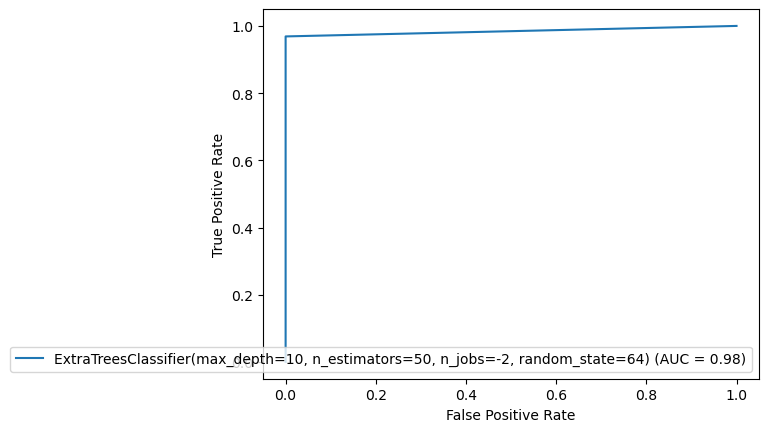

In [135]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model_2)
display.plot()

# Saving the model

In [136]:
import joblib

filename = "FinalModel_6.pkl"
joblib.dump(final_model_2, filename)

['FinalModel_6.pkl']

In [137]:
model=joblib.load("FinalModel_6.pkl")

prediction=model.predict(X_test)
prediction

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [138]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [139]:
df.tail()

,Predicted,Original
58,1,1
59,1,1
60,1,1
61,1,1
62,0,0
